# ElecKart Market Mix Modelling

Submitted by:

Sujay KS

Suraj Hegde

Aishwarya Ram

### We are going to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using our understanding of the model, we will recommend the optimal budget allocation for different marketing levers for the next year.

In [1]:
#Import all the libraries

import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('ConsumerElectronics.csv',na_values=[' '],low_memory=False)

In [3]:
data.shape

(1648824, 20)

In [4]:
data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [5]:
#Checking for dates that are out of the required range
data.order_date.sort_values(ascending=True)

1376093    2015-05-19 13:42:09
1436634    2015-06-11 18:21:50
1398258    2015-06-24 10:20:16
1385002    2015-06-25 16:28:12
1358453    2015-06-26 17:02:01
1429828    2015-06-26 17:27:12
1402659    2015-06-26 17:33:10
1412205    2015-07-01 00:36:11
1430199    2015-07-01 00:38:19
1391518    2015-07-01 03:35:02
1430073    2015-07-01 05:30:28
1430074    2015-07-01 06:30:36
1430200    2015-07-01 07:11:16
1430143    2015-07-01 07:31:07
1430260    2015-07-01 07:42:29
1430318    2015-07-01 07:44:39
1430382    2015-07-01 07:54:49
1374287    2015-07-01 08:03:03
1382668    2015-07-01 08:19:18
1407040    2015-07-01 09:02:59
1361916    2015-07-01 09:06:16
1420238    2015-07-01 09:23:17
1371610    2015-07-01 10:15:48
1430319    2015-07-01 10:22:31
1430075    2015-07-01 11:18:16
1411508    2015-07-01 11:23:29
1433914    2015-07-01 11:29:43
1420560    2015-07-01 11:43:08
1430076    2015-07-01 11:59:44
1380626    2015-07-01 15:48:51
                  ...         
1324654    2016-07-11 23:10:47
1290270 

-- EDA Begins --

In [6]:
#Changing the order_date to datetime format
data['order_date']=pd.to_datetime(data['order_date'])

In [7]:
#As per the problem statement, keeping the data from dates July 2015 to June 2016
data=data[(data['order_date'] > pd.Timestamp(date(2015,6,30))) & (data['order_date'] < pd.Timestamp(date(2016,7,1))) ]

In [8]:
#checking columns with single value
data[data.columns].nunique()

fsn_id                               21215
order_date                         1154612
Year                                     2
Month                                   12
order_id                           1500594
order_item_id                      1480182
gmv                                  12520
units                                   27
deliverybdays                          143
deliverycdays                          171
s1_fact.order_payment_type               2
sla                                     60
cust_id                            1200692
pincode                               7564
product_analytic_super_category          1
product_analytic_category                5
product_analytic_sub_category           14
product_analytic_vertical               74
product_mrp                           1928
product_procurement_sla                 17
dtype: int64

In [9]:
#As the column "product_analytic_super_category" has only a single variant, dropping the column
data=data.drop(['product_analytic_super_category'],axis=1)

In [10]:
round(100*(data['deliverybdays'].value_counts()/len(data.index)),2)

\N     79.65
4       3.76
5       3.67
3       3.25
6       2.95
2       2.27
7       1.55
1       1.20
8       0.76
9       0.36
10      0.18
0       0.14
11      0.09
12      0.05
13      0.03
14      0.02
15      0.01
16      0.01
17      0.00
19      0.00
18      0.00
20      0.00
21      0.00
26      0.00
23      0.00
27      0.00
38      0.00
28      0.00
32      0.00
72      0.00
       ...  
-14     0.00
238     0.00
90      0.00
-98     0.00
-74     0.00
-10     0.00
-22     0.00
135     0.00
-42     0.00
-46     0.00
114     0.00
-13     0.00
124     0.00
145     0.00
-56     0.00
-44     0.00
-41     0.00
-39     0.00
148     0.00
115     0.00
-73     0.00
147     0.00
-53     0.00
153     0.00
85      0.00
-40     0.00
-76     0.00
77      0.00
-45     0.00
-12     0.00
Name: deliverybdays, Length: 143, dtype: float64

In [11]:
round(100*(data['deliverycdays'].value_counts()/len(data.index)),2)

\N       79.65
5         3.42
6         3.15
4         3.07
3         2.45
7         2.33
2         1.71
8         1.41
1         0.93
9         0.82
10        0.44
11        0.24
12        0.13
13        0.07
14        0.04
0         0.03
15        0.03
16        0.01
17        0.01
18        0.01
19        0.01
20        0.00
21        0.00
22        0.00
23        0.00
24        0.00
31        0.00
27        0.00
32        0.00
37        0.00
         ...  
-5345     0.00
-849      0.00
-153      0.00
100       0.00
-879      0.00
-14       0.00
-893      0.00
169       0.00
99        0.00
154       0.00
-832      0.00
-655      0.00
145       0.00
-25       0.00
-884      0.00
140       0.00
-16       0.00
-516      0.00
134       0.00
-875      0.00
80        0.00
-835      0.00
-115      0.00
-512      0.00
-908      0.00
-532      0.00
-840      0.00
-492      0.00
-834      0.00
-544      0.00
Name: deliverycdays, Length: 171, dtype: float64

In [12]:
# Since we are going to consider SLA column values for delivery days, 
# and by also looking at the above outputs we have decided to drop the columns deliverybdays and deliverycdays.

In [13]:
data=data.drop(['deliverybdays','deliverycdays'],axis=1)

In [14]:
#Finding the null values
round(100*(data.isnull().sum(axis=0)/len(data.index)),2)

fsn_id                           0.0
order_date                       0.0
Year                             0.0
Month                            0.0
order_id                         0.0
order_item_id                    0.0
gmv                              0.3
units                            0.0
s1_fact.order_payment_type       0.0
sla                              0.0
cust_id                          0.3
pincode                          0.3
product_analytic_category        0.0
product_analytic_sub_category    0.0
product_analytic_vertical        0.0
product_mrp                      0.0
product_procurement_sla          0.0
dtype: float64

In [15]:
#From the above output we see that gmv, cust_id and pincode has null values, hence dropping the rows with null values

data=data[~np.isnan(data['gmv'])]
data=data[~np.isnan(data['cust_id'])]
data=data[~np.isnan(data['pincode'])]

In [16]:
#As MRP has to always be greater than 0, deleting rows with MRP <=0
data=data[data['product_mrp'] > 0]

In [17]:
## Analyzing gmv:  Gross Merchandise Value or Revenue and Units

#print("Blank cells in GMV column:",data.gmv[data['gmv'] == ' '].count())
print("Cells where GMV is zero:",data.gmv[data['gmv'] == 0].count())
print("Cells where units is zero:",data.gmv[data['units'] == 0].count())

Cells where GMV is zero: 985
Cells where units is zero: 0


In [18]:
data=data[data['gmv'] > 0]

In [19]:
#Keeping SLA values between 1 to 120
data=data[(data['sla']) > 0 & (data['sla'] <120)]

In [20]:
#As we cannot infer much from the categorical variables cust_id and pincode, dropping the columns.
data=data.drop(['cust_id','pincode'],axis=1)

In [21]:
#dropping duplicates based on order_id and order_item_id
data=data.drop_duplicates(['order_id','order_item_id'],keep='first')

In [22]:
#deleting rows which have higher gmv than list price
data=data[(data['units']*data['product_mrp'])-data['gmv'] > 0]

In [23]:
#Since product_procurement_sla cannot be lesser or equal to 0 nor greater than 1000, we are reoving those values from the dataset
data=data[(data['product_procurement_sla']) >= 0 & (data['product_procurement_sla'] <1000)]

-- KPI Creations --

    We are creating new variables using the exosting variables.

KPI 1 : Creating a new column called Week using order_date column. This column will be used to aggregate the sales data based on week number.

In [24]:
#creating week numbers for the data
data['week']=pd.DatetimeIndex(data['order_date']).week

In [25]:
#Assigning week numbers
data.loc[data.week < 27, 'week'] = data['week']+ 53

KPI 2 : Merging the Media Investment Sheet with the Customer Data Sheet.

In [26]:
#Importing the mediua investment sheet
media_investment=pd.read_excel('Media data and other information.xlsx',sheet_name='Media Investment',skiprows=[0,1])

In [27]:
#Only keeping the columns we need
media_investment=media_investment.iloc[0:12,1:]

In [28]:
media_investment.shape

(12, 12)

In [29]:
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [30]:
#Filling NA with 0
media_investment=media_investment.fillna(0)

In [31]:
#Merging our dataset with media investment
data=data.merge(media_investment, on=['Year','Month'], how = 'inner')

In [32]:
data.shape

(1381985, 26)

In [33]:
#Dropping Total Investment as we do not infer anything from it
data=data.drop(['Total Investment'],axis=1)

KPI 3 : Merging the Weather data from files Ontario-2015 and Ontario-2016 Sheet with the Customer Data Sheet.

In [34]:
#Importing sheets
on_2015=pd.read_csv('ONTARIO-2015.csv',skiprows=
                    24)
on_2016=pd.read_csv('ONTARIO-2016.csv',skiprows=24)

In [35]:
#Filling NA with 0
on_2015=on_2015.fillna(0)
on_2016=on_2016.fillna(0)

In [36]:
climate=on_2015.append(on_2016)

In [37]:
climate.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,0,-8.5,0,-4.3,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,†,3.0,0,-3.0,0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,†,2.5,0,-4.0,0,-0.8,...,0.0,0,24.0,0,0.0,0,0.0,0.0,0.0,0.0
3,2015-01-04,2015,1,4,†,2.5,0,0.0,0,1.3,...,1.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
4,2015-01-05,2015,1,5,†,-10.0,0,-13.5,0,-11.8,...,3.0,0,3.0,0,1.0,0,0.0,0.0,0.0,0.0


In [38]:
#Keeping only those columns we require
col=['Date/Time','Mean Temp (°C)','Total Snow (cm)']
climate=climate[col]

In [39]:
climate.rename(columns = {"Date/Time": "date", "Mean Temp (°C)": "Mean_Temp", "Total Snow (cm)" : "Total_Snow"}, inplace = True)

In [40]:
climate.head(5)

,date,Mean_Temp,Total_Snow
0,2015-01-01,-4.3,0.0
1,2015-01-02,0.0,0.0
2,2015-01-03,-0.8,0.0
3,2015-01-04,1.3,1.0
4,2015-01-05,-11.8,3.0


In [41]:
climate['date']=pd.to_datetime(climate['date'])
climate['date']=climate['date'].dt.date

In [42]:
data['date']=data['order_date'].dt.date
data=data.merge(climate, on=['date'], how = 'inner')

In [43]:
data.shape

(1381985, 28)

KPI 4 : Merging the sentiment analysis data with Customer data set

In [44]:
#Import the sheet
nps=pd.read_excel('Media data and other information.xlsx',sheet_name='Monthly NPS Score',skiprows=1)

In [45]:
nps

,Unnamed: 0,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687
1,Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000


In [46]:
nps=nps.T

In [47]:
nps=nps.iloc[1:,:]

In [48]:
nps.columns=['NPS','Stock_Index']

In [49]:
nps['Year']=['2015','2015','2015','2015','2015','2015','2016','2016','2016','2016','2016','2016',]

In [50]:
nps['Month']=['7','8','9','10','11','12','1','2','3','4','5','6']

In [51]:
nps=nps.reset_index(drop=True)

In [52]:
nps

,NPS,Stock_Index,Year,Month
0,54.5996,1177,2015,7
1,59.9871,1206,2015,8
2,46.9254,1101,2015,9
3,44.3984,1210,2015,10
4,47,1233,2015,11
5,45.8,1038,2015,12
6,47.093,1052,2016,1
7,50.3274,1222,2016,2
8,49.0206,1015,2016,3
9,51.8276,1242,2016,4


In [53]:
nps.Year = nps.Year.astype('int64') 

In [54]:
nps.Month = nps.Month.astype('int64') 

In [55]:
data=data.merge(nps, on=['Year','Month'], how = 'inner')

KPI 5 : Adding the Sales data to Customer data 

In [56]:
sale_date=['2015-07-01','2015-07-15','2015-07-18','2015-07-19',
           '2015-08-01','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
           '2015-09-01','2015-09-15',
          '2015-10-01','2015-10-15','2015-10-16','2015-10-17',
           '2015-11-01','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12','2015-11-13','2015-11-14','2015-11-15',
           '2015-12-01','2015-12-15','2015-11-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
          '2016-01-01','2016-01-02','2016-01-03','2016-01-15','2016-01-20','2016-01-21','2016-01-22',
           '2016-02-01','2016-02-02','2016-02-14','2016-02-15','2016-02-20','2016-02-21',
          '2016-03-01','2016-03-07','2016-03-08','2016-03-09','2016-03-15',
          '2016-04-01','2016-04-15',
           '2016-05-01','2016-05-15','2016-05-25','2016-05-26','2016-05-27',
          '2015-06-01','2015-06-15']

In [57]:
sale_date=pd.DataFrame(sale_date)

In [58]:
sale_date.columns=['date']

In [59]:
data["date"]= data["date"].astype(str)
sale_date["date"]= sale_date["date"].astype(str)

In [60]:
#Create and initialse new column sale
data['sale']=0
data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,Affiliates,SEM,Radio,Other,date,Mean_Temp,Total_Snow,NPS,Stock_Index,sale
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,...,6.973711,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,0
1,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,6.973711,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,0
2,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,Prepaid,5,...,6.973711,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,0
3,ACCCX3SG2GG9YYAH,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,COD,6,...,6.973711,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,0
4,ACCCX3SG2GG9YYAH,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,COD,9,...,6.973711,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,0


In [61]:
data.loc[data['date'].isin(sale_date['date']),'sale']=1

In [62]:
data.sale.value_counts()

0    1068974
1     313011
Name: sale, dtype: int64

In [63]:
data.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'week', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'date',
       'Mean_Temp', 'Total_Snow', 'NPS', 'Stock_Index', 'sale'],
      dtype='object')

KPI 6 : Creating the column List Price from GMV and no of Units

In [64]:
data['list_price'] = data['gmv'] / data['units']

KPI 7 : Discounts

In [65]:
data['discount'] = (data['product_mrp'] - data['list_price'])/data['product_mrp']
#data['discount_percent'] = (data['discount'] * 100) /data['product_mrp']

#Dropping list_price
data.drop('list_price',axis=1, inplace = True)


KPI 8 : Splitting our dataset into three sub categories camera, Home Audio and Gaming as per problem statement

In [66]:
camera=data[data['product_analytic_sub_category']=='CameraAccessory']
camera.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,SEM,Radio,Other,date,Mean_Temp,Total_Snow,NPS,Stock_Index,sale,discount
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.109875
1,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.229157
2,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,Prepaid,5,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.178042
3,ACCCX3SG2GG9YYAH,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,COD,6,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.056084
4,ACCCX3SG2GG9YYAH,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,COD,9,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.067133


In [67]:
home_audio=data[data['product_analytic_sub_category']=='HomeAudio']
home_audio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,SEM,Radio,Other,date,Mean_Temp,Total_Snow,NPS,Stock_Index,sale,discount
254,ACCCZZC9XHZZ49FS,2015-10-17 00:19:35,2015,10,2.418763e+15,2.418763e+15,6194.0,1,Prepaid,7,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.174023
255,ACCCZZC9ZNXPV9JH,2015-10-17 11:50:25,2015,10,2.419180e+15,2.419180e+15,5984.0,1,Prepaid,4,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.401540
256,ACCCZZC9ZNXPV9JH,2015-10-17 11:56:03,2015,10,4.419183e+15,4.419183e+15,6163.0,1,Prepaid,8,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.383638
551,ACCD8DHHAYCHNJZZ,2015-10-17 17:17:30,2015,10,2.419377e+15,2.419377e+15,4950.0,1,COD,4,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.219981
552,ACCD8DHHRNMR5K34,2015-10-17 19:43:45,2015,10,3.419464e+15,3.419464e+15,6750.0,1,Prepaid,6,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.156145


In [68]:
gaming=data[data['product_analytic_sub_category']=='GamingAccessory']
gaming.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,SEM,Radio,Other,date,Mean_Temp,Total_Snow,NPS,Stock_Index,sale,discount
169,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609.0,1,Prepaid,5,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.347587
170,ACCCZ34CBVZJTVQF,2015-10-17 22:36:08,2015,10,3.419568e+15,3.419568e+15,3079.0,1,COD,6,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.230058
171,ACCCZ34CBVZJTVQF,2015-10-17 22:33:02,2015,10,4.419567e+15,4.419567e+15,2899.0,1,COD,5,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.275069
172,ACCCZ34CBZFWKPBQ,2015-10-17 08:41:53,2015,10,1.419067e+15,1.419067e+15,1310.0,1,COD,9,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.625714
173,ACCCZ34CBZFWKPBQ,2015-10-17 12:15:01,2015,10,2.419195e+15,2.419195e+15,1310.0,1,COD,9,...,31.927011,0.0,0.0,2015-10-17,0.0,0.0,44.3984,1210,1,0.625714


In [69]:
col=['fsn_id','order_date','date','Year','Month','order_id','order_item_id','product_analytic_category','product_analytic_sub_category','product_analytic_vertical']
camera=camera.drop(col,axis=1)
home_audio=home_audio.drop(col,axis=1)
gaming=gaming.drop(col,axis=1)

In [70]:
#Dummy variables creation
#Converting s1_fact.order_payment_type to binary

map_col=['s1_fact.order_payment_type']

#Defining a binary function for dummy variables
def binary_map(x):
    return x.map({'COD':1, 'Prepaid':0})

camera[map_col]=camera[map_col].apply(binary_map)
home_audio[map_col]=home_audio[map_col].apply(binary_map)
gaming[map_col]=gaming[map_col].apply(binary_map)

In [71]:
#Converting data into int64
camera=camera.astype('int64') 
home_audio=home_audio.astype('int64')
gaming=gaming.astype('int64')

KPI 9 : Grouping the datasets with respect to Week

In [72]:
camera=camera.groupby(['week']).agg({'gmv':'sum','units':'sum','s1_fact.order_payment_type':'mean','sla':'mean','product_mrp':'sum','product_procurement_sla':'mean','TV':'mean','Digital':'mean','Sponsorship':'mean','Content Marketing':'mean','Online marketing':'mean',' Affiliates':'mean','SEM':'mean','Radio':'mean','Other':'mean','Mean_Temp':'mean','Total_Snow':'mean','NPS':'mean','Stock_Index':'mean','sale':'sum','discount':'mean'})[['gmv','units','s1_fact.order_payment_type','sla','product_mrp','product_procurement_sla','TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio', 'Other','Mean_Temp','Total_Snow','NPS','Stock_Index','sale','discount']]
home_audio=home_audio.groupby(['week']).agg({'gmv':'sum','units':'sum','s1_fact.order_payment_type':'mean','sla':'mean','product_mrp':'sum','product_procurement_sla':'mean','TV':'mean','Digital':'mean','Sponsorship':'mean','Content Marketing':'mean','Online marketing':'mean',' Affiliates':'mean','SEM':'mean','Radio':'mean','Other':'mean','Mean_Temp':'mean','Total_Snow':'mean','NPS':'mean','Stock_Index':'mean','sale':'sum','discount':'mean'})[['gmv','units','s1_fact.order_payment_type','sla','product_mrp','product_procurement_sla','TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio', 'Other','Mean_Temp','Total_Snow','NPS','Stock_Index','sale','discount']]
gaming=gaming.groupby(['week']).agg({'gmv':'sum','units':'sum','s1_fact.order_payment_type':'mean','sla':'mean','product_mrp':'sum','product_procurement_sla':'mean','TV':'mean','Digital':'mean','Sponsorship':'mean','Content Marketing':'mean','Online marketing':'mean',' Affiliates':'mean','SEM':'mean','Radio':'mean','Other':'mean','Mean_Temp':'mean','Total_Snow':'mean','NPS':'mean','Stock_Index':'mean','sale':'sum','discount':'mean'})[['gmv','units','s1_fact.order_payment_type','sla','product_mrp','product_procurement_sla','TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio', 'Other','Mean_Temp','Total_Snow','NPS','Stock_Index','sale','discount']]

In [73]:
#converting monthly investment to weekly

media_col=['TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio','Other']
camera[media_col]=camera[media_col]/4
home_audio[media_col]=home_audio[media_col]/4
gaming[media_col]=gaming[media_col]/4

KPI 10 : Creating adstock and adding it to Customer data

In [74]:
#creating adstock for media investment
import statsmodels.api as sm
import statsmodels.tsa as tsa

In [75]:
#Setting the the value of coef to 0.5

coeff=0.5

#adding the adstock to camera

camera['TV_adstock']= tsa.filters.filtertools.recursive_filter(camera['TV'], coeff)
camera['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(camera['Digital'], coeff)
camera['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(camera['Sponsorship'], coeff)
camera['Content_Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(camera['Content Marketing'], coeff)
camera['Online_Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(camera['Online marketing'], coeff)
camera['Affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(camera[' Affiliates'], coeff)
camera['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(camera['SEM'], coeff)
camera['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(camera['Radio'], coeff)
camera['Other_adstock'] = tsa.filters.filtertools.recursive_filter(camera['Other'], coeff)

In [76]:
camera=camera.drop(media_col,axis=1)

In [77]:
#adding the adstock to home audio dataset

home_audio['TV_adstock']= tsa.filters.filtertools.recursive_filter(home_audio['TV'], coeff)
home_audio['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio['Digital'], coeff)
home_audio['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio['Sponsorship'], coeff)
home_audio['Content_Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio['Content Marketing'], coeff)
home_audio['Online_Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio['Online marketing'], coeff)
home_audio['Affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio[' Affiliates'], coeff)
home_audio['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio['SEM'], coeff)
home_audio['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio['Radio'], coeff)
home_audio['Other_adstock'] = tsa.filters.filtertools.recursive_filter(home_audio['Other'], coeff)

In [78]:
home_audio=home_audio.drop(media_col,axis=1)

In [79]:
#adding the adstock to gaming dataset
gaming['TV_adstock']= tsa.filters.filtertools.recursive_filter(gaming['TV'], coeff)
gaming['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(gaming['Digital'], coeff)
gaming['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(gaming['Sponsorship'], coeff)
gaming['Content_Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(gaming['Content Marketing'], coeff)
gaming['Online_Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(gaming['Online marketing'], coeff)
gaming['Affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(gaming[' Affiliates'], coeff)
gaming['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(gaming['SEM'], coeff)
gaming['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(gaming['Radio'], coeff)
gaming['Other_adstock'] = tsa.filters.filtertools.recursive_filter(gaming['Other'], coeff)

In [80]:
gaming=gaming.drop(media_col,axis=1)

Plotting pair plots and correlation plots to understand data

In [81]:
camera.columns

Index(['gmv', 'units', 's1_fact.order_payment_type', 'sla', 'product_mrp',
       'product_procurement_sla', 'Mean_Temp', 'Total_Snow', 'NPS',
       'Stock_Index', 'sale', 'discount', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'Content_Marketing_adstock',
       'Online_Marketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock'],
      dtype='object')

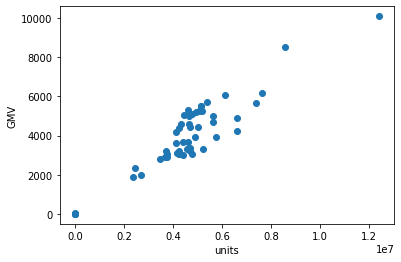

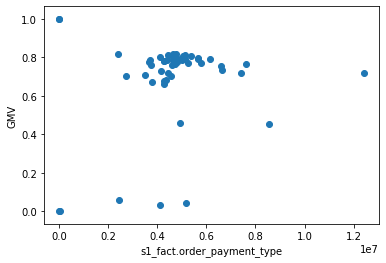

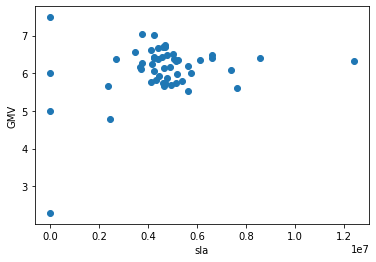

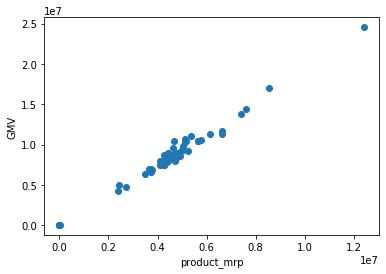

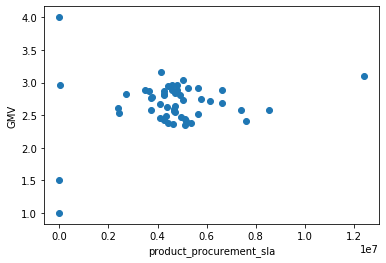

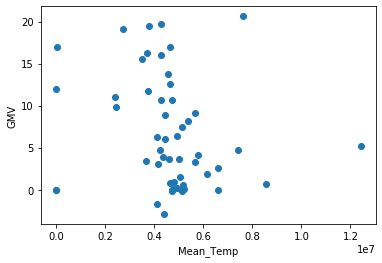

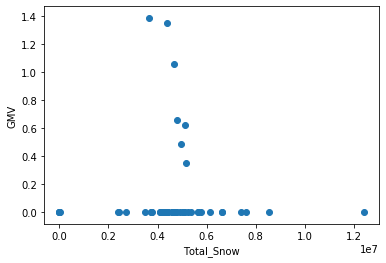

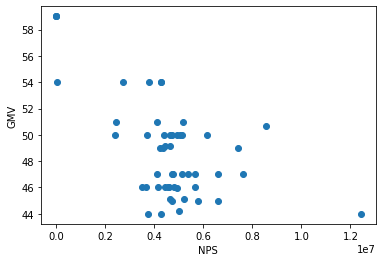

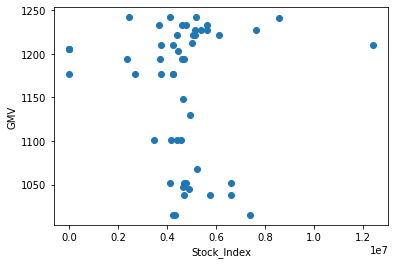

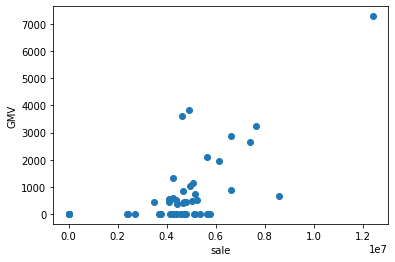

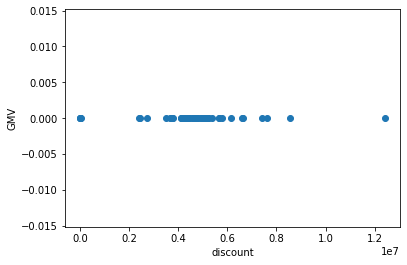

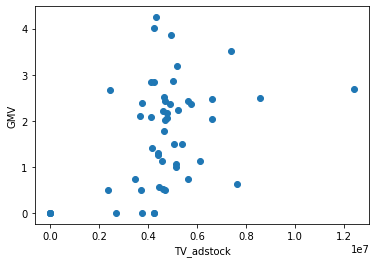

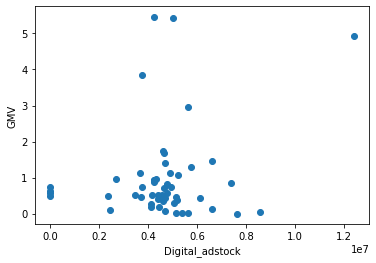

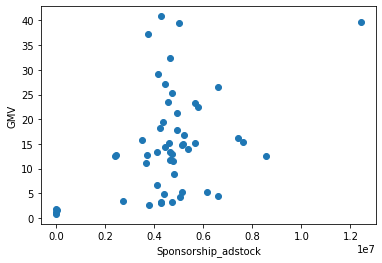

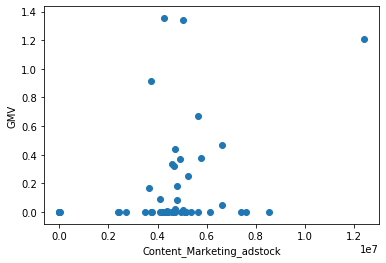

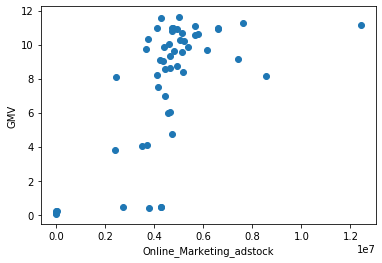

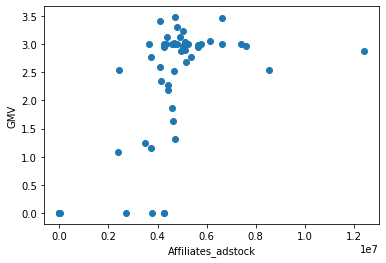

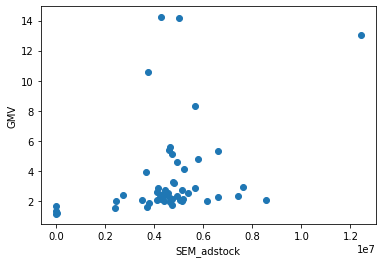

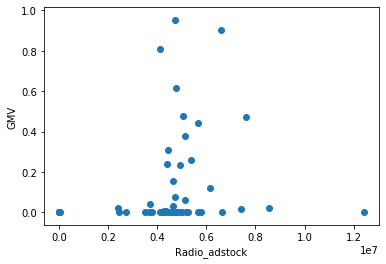

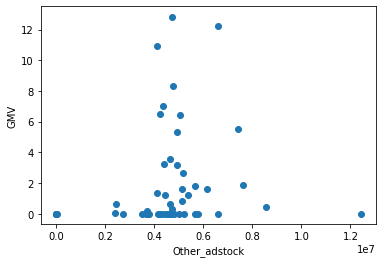

In [82]:
## Pairplot for Camera category
import matplotlib.pyplot as plt 
import seaborn as sns# Pair plot of all the values against GMV


plt.figure()
for col in range(1, camera.shape[1]):
    plt.scatter(camera["gmv"], camera.iloc[:, col])
    plt.xlabel(camera.columns[col])
    plt.ylabel("GMV")
    plt.show()

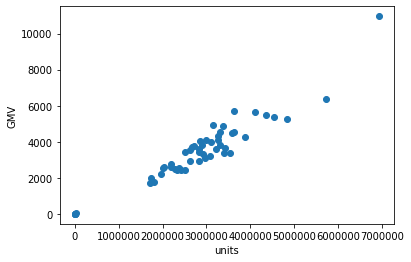

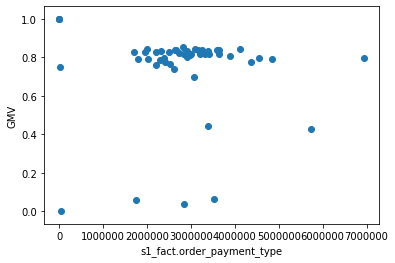

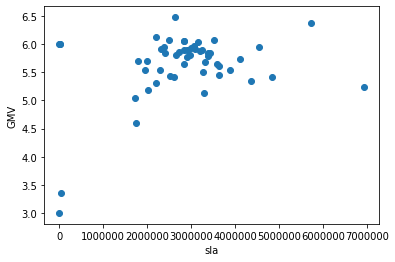

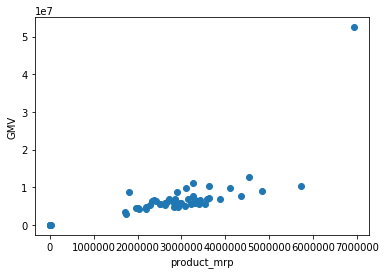

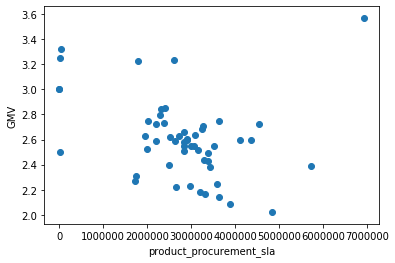

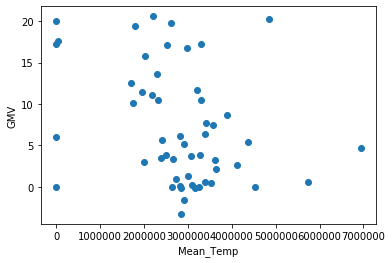

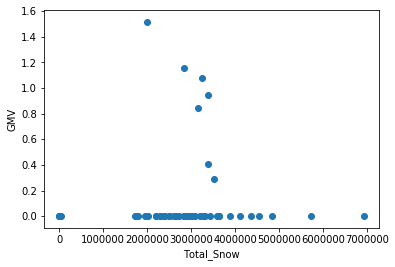

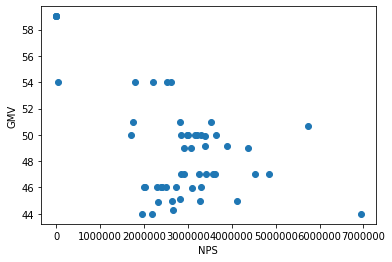

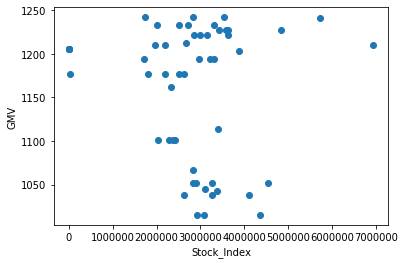

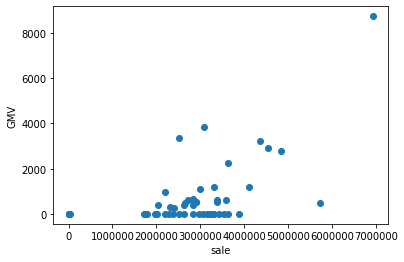

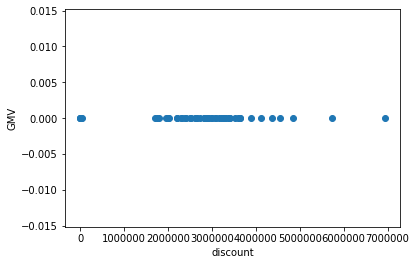

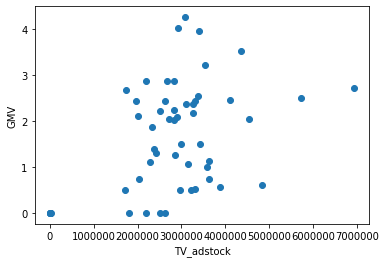

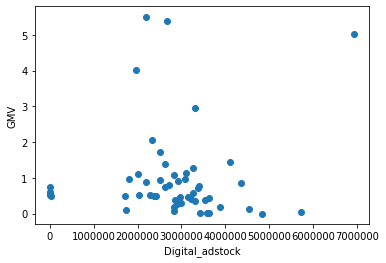

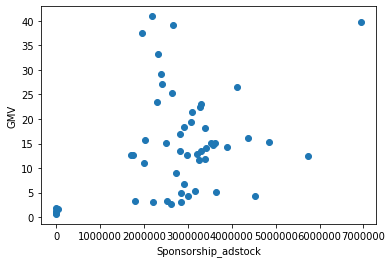

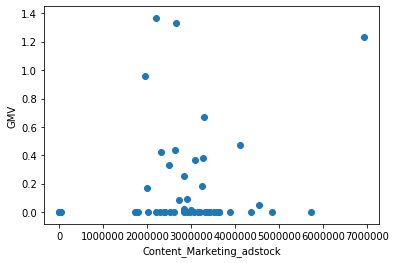

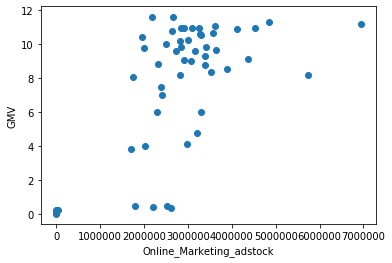

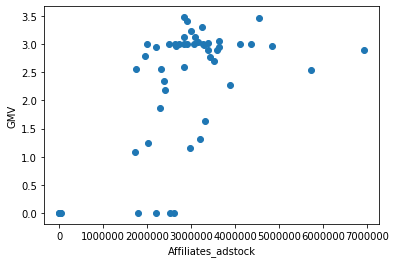

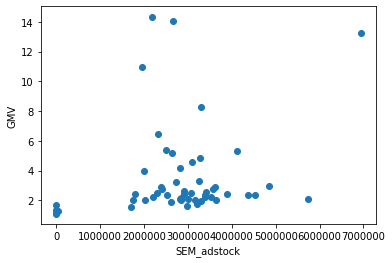

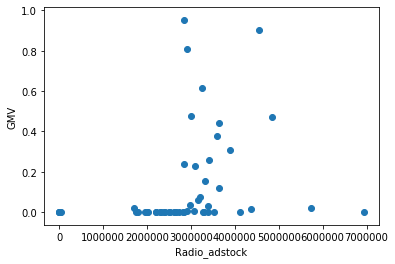

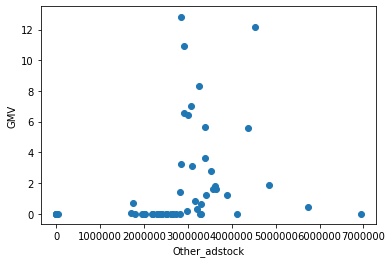

In [83]:
## Pairplot for gaming dataset
import matplotlib.pyplot as plt 
import seaborn as sns# Pair plot of all the values against GMV


plt.figure()
for col in range(1, gaming.shape[1]):
    plt.scatter(gaming["gmv"], gaming.iloc[:, col])
    plt.xlabel(gaming.columns[col])
    plt.ylabel("GMV")
    plt.show()

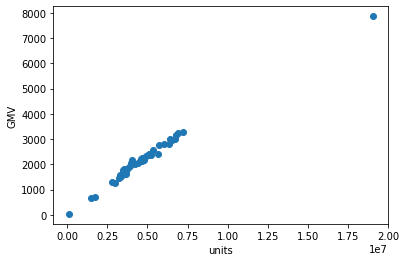

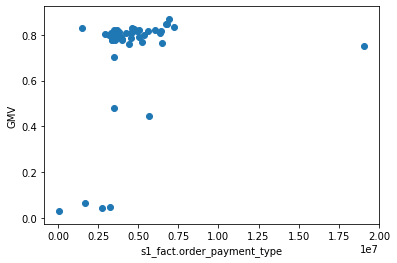

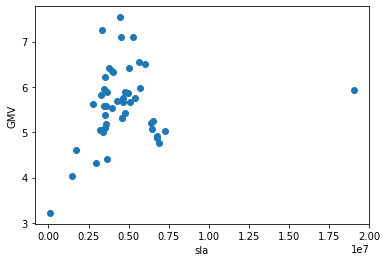

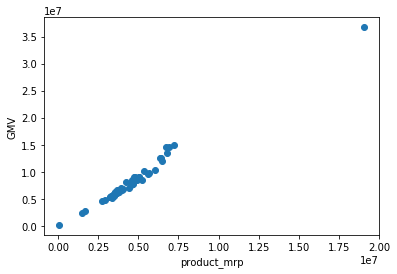

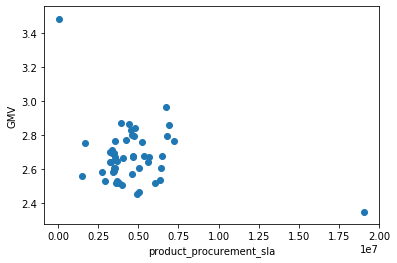

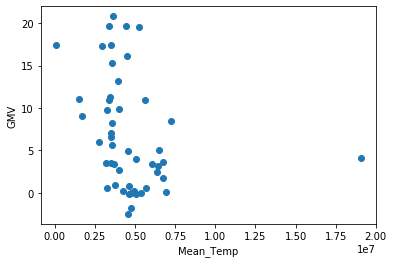

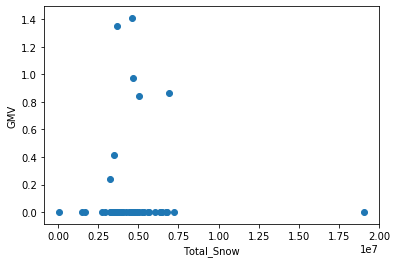

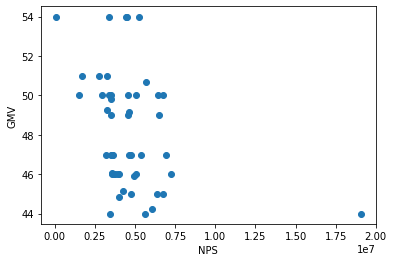

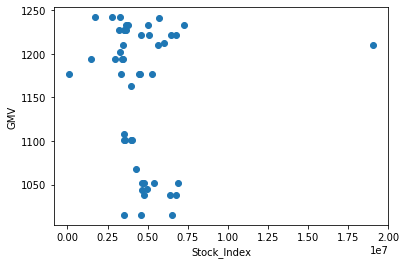

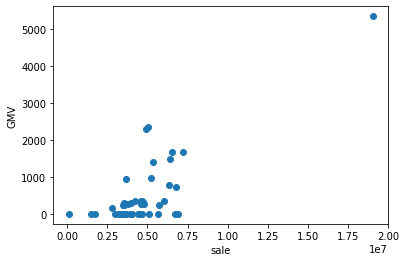

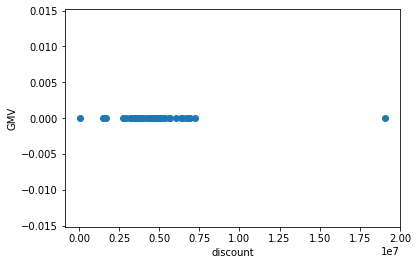

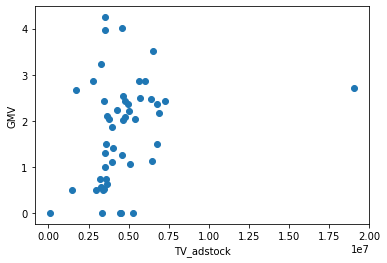

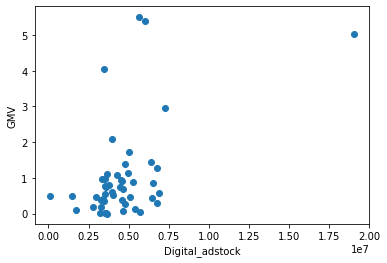

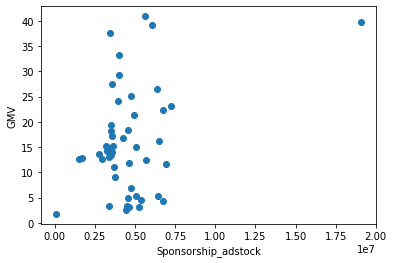

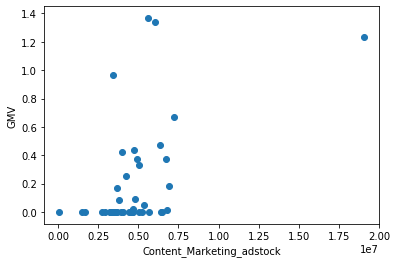

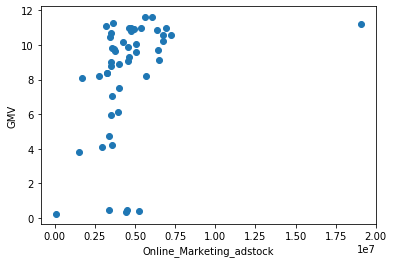

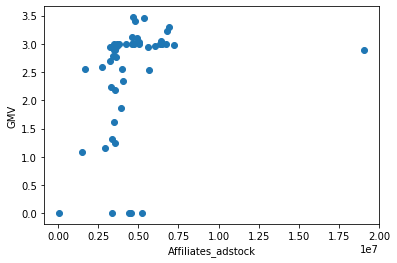

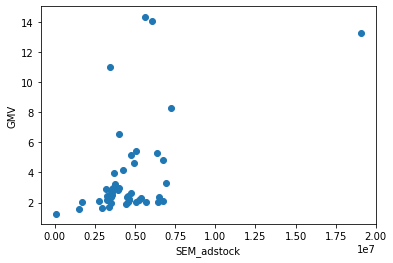

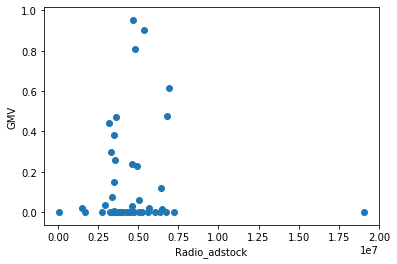

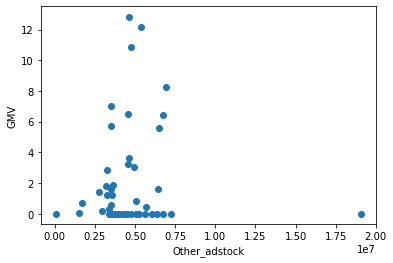

In [84]:
## Pairplot for home_audio dataset
import matplotlib.pyplot as plt 
import seaborn as sns# Pair plot of all the values against GMV


plt.figure()
for col in range(1, home_audio.shape[1]):
    plt.scatter(home_audio["gmv"], home_audio.iloc[:, col])
    plt.xlabel(home_audio.columns[col])
    plt.ylabel("GMV")
    plt.show()

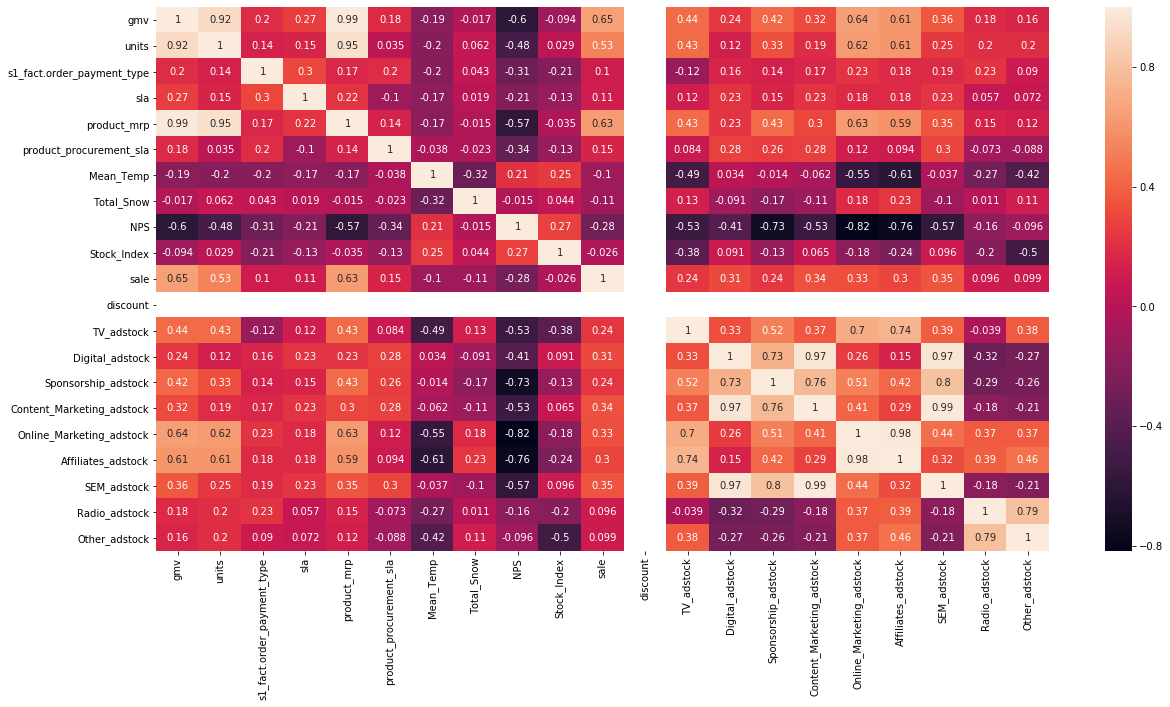

In [85]:
## Correlation matric for camera

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(camera.corr(),annot = True)
plt.show()

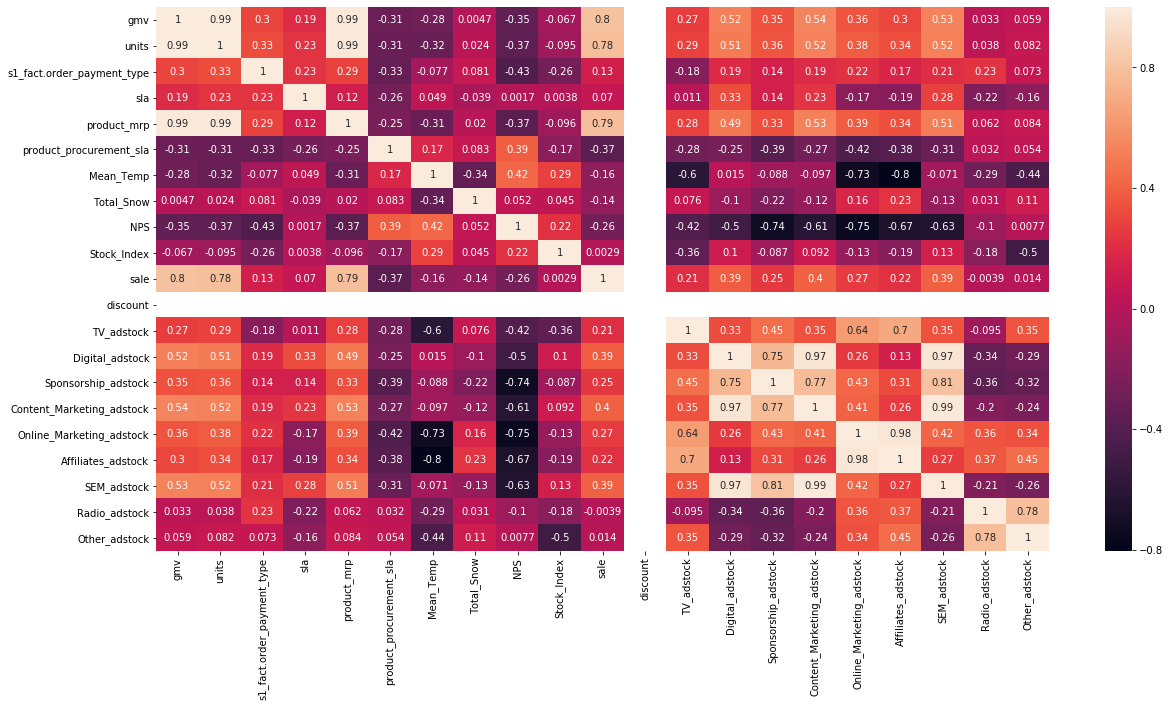

In [86]:
## Correlation matric for home audio

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(home_audio.corr(),annot = True)
plt.show()

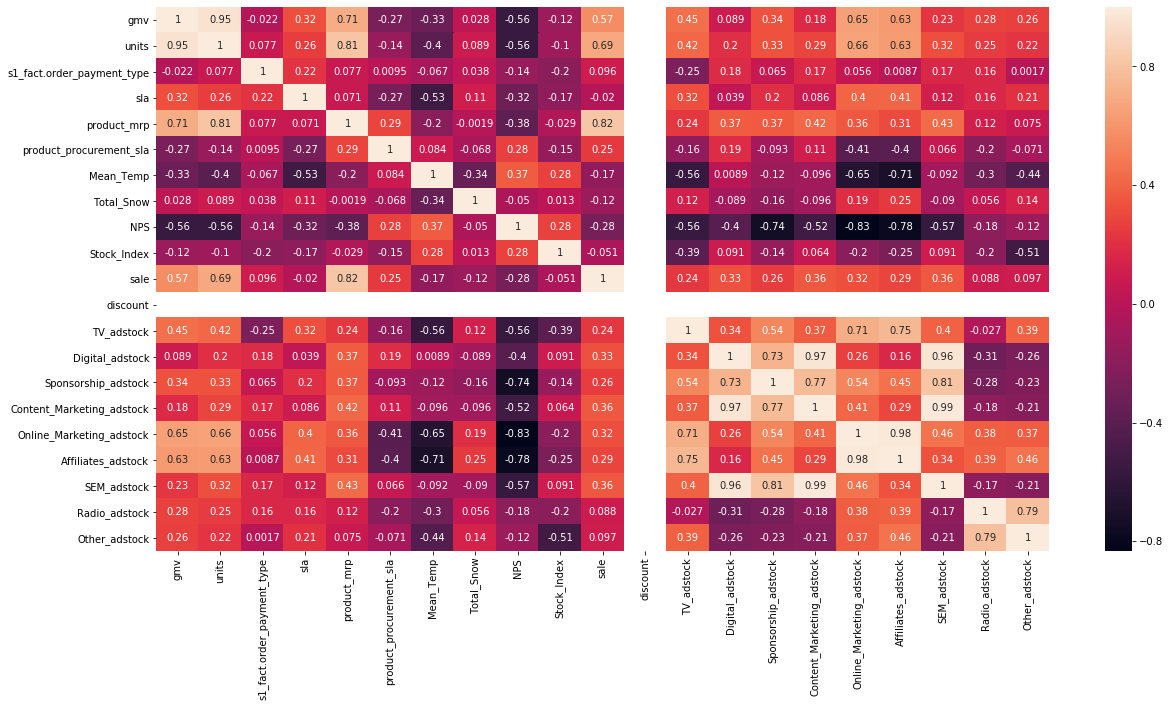

In [87]:
## Correlation matric for gaming

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(gaming.corr(),annot = True)
plt.show()

In [88]:
# As we do not see any variance in column discount, dropping column dicount. 

camera.drop('discount',axis=1,inplace=True)

home_audio.drop('discount',axis=1,inplace=True)

gaming.drop('discount',axis=1,inplace=True)

-- EDA Ends --


At this point, we have completed the EDA and created 10 KPIs. The next step is to start the model building.

### Model Building Begins

        As part of this market mix modelling, we will be building four different models and analyze the results
        For this exercise we will be building Linear model, Multiplicative model, Koyck model 
        and Distributed Lag model. The reults will be analysed based on R2 score and MSE and find the independant
        variables that effect the sails.

Linear Model

In [89]:
#modelling with basic linear model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Starting Linear modelling for camera dataset

In [90]:


#Splitting data into train and test

camera_linear_train,camera_linear_test=train_test_split(camera,train_size=0.8,test_size=0.2,random_state=100)

In [91]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')

camera_linear_train[camera_linear_train.columns]=scale.fit_transform(camera_linear_train[camera_linear_train.columns])

In [92]:
#Defining the linear regression variable

lr=LinearRegression()
x_camera=camera_linear_train.drop(['gmv'],axis=1)
y_camera=camera_linear_train['gmv']

In [93]:
#Fitting the model

lr.fit(x_camera,y_camera)

#using RFE method
rfe=RFE(lr,8)
rfe=rfe.fit(x_camera,y_camera)

In [94]:
#filtering with only rfe columns
x_camera=x_camera[x_camera.columns[rfe.support_]]

In [95]:
# Adding the constant for linear regression

x_camera_train=sm.add_constant(x_camera)

In [96]:
#Running the OLS regression

lr_camera=sm.OLS(y_camera,x_camera_train).fit()

In [97]:
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     325.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.06e-28
Time:                        00:20:55   Log-Likelihood:                 108.37
No. Observations:                  41   AIC:                            -198.7
Df Residuals:                      32   BIC:                            -183.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0056      0.016     -0.345      0.732      -0.038       0.027
units                       -0.2707      0.062     -4.398      0.000      -0.396      -0.145
product_mrp                  1.2772      0.070     18.145      0.000       1.134       1.421
Digital_adstock              0.3155      0.152      2.073      0.046       0.006       0.625
Online_Marketing_adstock     0.2142      0.132      1.627      0.114      -0.054       0.482
Affiliates_adstock          -0.1581      0.122     -1.293      0.205      -0.407       0.091
SEM_adstock                 -0.3640      0.167     -2.176      0.037      -0.705      -0.023
Radio_adstock                0.0359      0.045      0.794      0.433      -0.056       0.128
Other_adstock                0.0021      0.048      0.044      0.966      -0.096       0.100
==============================================================================
Omnibus:                        9.978   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.164
Skew:                          -1.007   Prob(JB):                       0.0102
Kurtosis:                       4.143   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#Here onwards using VIF to eliminate the features and find independant variables that effect the sales.

vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
6,SEM_adstock,195.48
4,Online_Marketing_adstock,185.45
3,Digital_adstock,162.80
5,Affiliates_adstock,159.66
0,const,27.96
8,Other_adstock,17.47
7,Radio_adstock,15.44
2,product_mrp,13.04
1,units,12.44


In [99]:
x_camera=x_camera.drop(['SEM_adstock'],axis=1)

In [100]:
x_camera_train=sm.add_constant(x_camera)

In [101]:
lr_camera=sm.OLS(y_camera,x_camera_train).fit()
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     333.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           9.78e-29
Time:                        00:20:56   Log-Likelihood:                 105.54
No. Observations:                  41   AIC:                            -195.1
Df Residuals:                      33   BIC:                            -181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0242      0.009      2.698      0.011       0.006       0.042
units                       -0.2581      0.065     -3.992      0.000      -0.390      -0.127
product_mrp                  1.2531      0.073     17.086      0.000       1.104       1.402
Digital_adstock             -0.0113      0.026     -0.432      0.668      -0.064       0.042
Online_Marketing_adstock     0.1218      0.132      0.926      0.361      -0.146       0.389
Affiliates_adstock          -0.1200      0.128     -0.940      0.354      -0.380       0.140
Radio_adstock               -0.0198      0.039     -0.502      0.619      -0.100       0.060
Other_adstock                0.0614      0.042      1.469      0.151      -0.024       0.146
==============================================================================
Omnibus:                       11.603   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.811
Skew:                          -1.025   Prob(JB):                      0.00272
Kurtosis:                       4.646   Cond. No.                         92.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,Online_Marketing_adstock,166.16
5,Affiliates_adstock,156.39
2,product_mrp,12.71
1,units,12.33
7,Other_adstock,11.86
6,Radio_adstock,10.50
0,const,7.79
3,Digital_adstock,4.30


In [103]:
x_camera=x_camera.drop(['Online_Marketing_adstock'],axis=1)

In [104]:
x_camera_train=sm.add_constant(x_camera)

In [105]:
lr_camera=sm.OLS(y_camera,x_camera_train).fit()
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     390.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           7.18e-30
Time:                        00:20:56   Log-Likelihood:                 105.01
No. Observations:                  41   AIC:                            -196.0
Df Residuals:                      34   BIC:                            -184.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0231      0.009      2.606      0.013       0.005       0.041
units                 -0.2470      0.063     -3.895      0.000      -0.376      -0.118
product_mrp            1.2462      0.073     17.115      0.000       1.098       1.394
Digital_adstock        0.0086      0.015      0.583      0.564      -0.021       0.039
Affiliates_adstock    -0.0024      0.014     -0.178      0.860      -0.030       0.025
Radio_adstock          0.0096      0.023      0.413      0.682      -0.038       0.057
Other_adstock          0.0299      0.024      1.236      0.225      -0.019       0.079
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.703
Skew:                          -1.072   Prob(JB):                     0.000642
Kurtosis:                       5.003   Cond. No.                         40.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,product_mrp,12.58
1,units,11.90
0,const,7.67
6,Other_adstock,3.98
5,Radio_adstock,3.69
4,Affiliates_adstock,1.76
3,Digital_adstock,1.39


In [107]:
x_camera=x_camera.drop(['product_mrp'],axis=1)

In [108]:
x_camera_train=sm.add_constant(x_camera)
lr_camera=sm.OLS(y_camera,x_camera_train).fit()
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     43.95
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.07e-14
Time:                        00:20:56   Log-Likelihood:                 58.612
No. Observations:                  41   AIC:                            -105.2
Df Residuals:                      35   BIC:                            -94.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0417      0.027      1.548      0.131      -0.013       0.096
units                  0.7738      0.066     11.765      0.000       0.640       0.907
Digital_adstock        0.0792      0.043      1.827      0.076      -0.009       0.167
Affiliates_adstock     0.0241      0.041      0.588      0.560      -0.059       0.107
Radio_adstock          0.0973      0.069      1.402      0.170      -0.044       0.238
Other_adstock         -0.0924      0.071     -1.310      0.199      -0.236       0.051
==============================================================================
Omnibus:                        2.380   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.455
Skew:                           0.174   Prob(JB):                        0.483
Kurtosis:                       2.145   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,7.55
5,Other_adstock,3.63
4,Radio_adstock,3.51
3,Affiliates_adstock,1.74
1,units,1.37
2,Digital_adstock,1.28


In [110]:
x_camera_train=x_camera
lr_camera=sm.OLS(y_camera,x_camera_train).fit()
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              328.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    5.74e-29
Time:                        00:20:56   Log-Likelihood:                          57.254
No. Observations:                  41   AIC:                                     -104.5
Df Residuals:                      36   BIC:                                     -95.94
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
units                  0.8232      0.059     14.049      0.000       0.704       0.942
Digital_adstock        0.0844      0.044      1.915      0.063      -0.005       0.174
Affiliates_adstock     0.0484      0.039      1.253      0.218      -0.030       0.127
Radio_adstock          0.0934      0.071      1.320      0.195      -0.050       0.237
Other_adstock         -0.0930      0.072     -1.293      0.204      -0.239       0.053
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                1.649
Skew:                          -0.041   Prob(JB):                        0.438
Kurtosis:                       2.021   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Affiliates_adstock,8.17
0,units,6.39
4,Other_adstock,4.66
3,Radio_adstock,4.32
1,Digital_adstock,2.07


In [112]:
x_camera=x_camera.drop(['Affiliates_adstock'],axis=1)

In [113]:
x_camera_train=x_camera
lr_camera=sm.OLS(y_camera,x_camera_train).fit()
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              403.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    5.74e-30
Time:                        00:20:56   Log-Likelihood:                          56.379
No. Observations:                  41   AIC:                                     -104.8
Df Residuals:                      37   BIC:                                     -97.90
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
units               0.8813      0.036     24.433      0.000       0.808       0.954
Digital_adstock     0.1022      0.042      2.432      0.020       0.017       0.187
Radio_adstock       0.0945      0.071      1.326      0.193      -0.050       0.239
Other_adstock      -0.0658      0.069     -0.953      0.347      -0.206       0.074
==============================================================================
Omnibus:                        1.353   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.010
Skew:                           0.065   Prob(JB):                        0.604
Kurtosis:                       2.242   Cond. No.                         5.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Radio_adstock,4.32
3,Other_adstock,4.23
0,units,2.38
1,Digital_adstock,1.85


In [115]:
x_camera=x_camera.drop(['Other_adstock'],axis=1)

In [116]:
x_camera_train=x_camera
lr_camera=sm.OLS(y_camera,x_camera_train).fit()
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              539.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    3.54e-31
Time:                        00:20:56   Log-Likelihood:                          55.882
No. Observations:                  41   AIC:                                     -105.8
Df Residuals:                      38   BIC:                                     -100.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
units               0.8767      0.036     24.556      0.000       0.804       0.949
Digital_adstock     0.1024      0.042      2.439      0.019       0.017       0.187
Radio_adstock       0.0391      0.041      0.949      0.348      -0.044       0.122
==============================================================================
Omnibus:                        3.951   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.831
Skew:                           0.159   Prob(JB):                        0.400
Kurtosis:                       2.014   Cond. No.                         2.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,2.34
1,Digital_adstock,1.85
2,Radio_adstock,1.45


In [118]:
x_camera=x_camera.drop(['Radio_adstock'],axis=1)

In [119]:
x_camera_train=x_camera
lr_camera=sm.OLS(y_camera,x_camera_train).fit()
lr_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              810.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.71e-32
Time:                        00:20:56   Log-Likelihood:                          55.402
No. Observations:                  41   AIC:                                     -106.8
Df Residuals:                      39   BIC:                                     -103.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
units               0.8955      0.030     30.171      0.000       0.835       0.956
Digital_adstock     0.0884      0.039      2.252      0.030       0.009       0.168
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.225
Skew:                           0.136   Prob(JB):                        0.329
Kurtosis:                       1.891   Cond. No.                         2.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,1.62
1,Digital_adstock,1.62


In [121]:
camera_linear_test[camera_linear_test.columns]=scale.transform(camera_linear_test[camera_linear_test.columns])

In [122]:
y_camera_train=lr_camera.predict(x_camera_train)

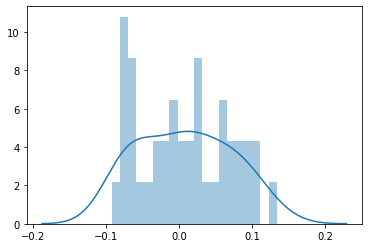

In [123]:
fig=plt.figure()
sns.distplot((y_camera-y_camera_train),bins=20)

In [124]:
x_camera_test=camera_linear_test.drop(['gmv'],axis=1)
y_camera_test=camera_linear_test['gmv']

In [125]:
x_camera_test=x_camera_test[x_camera_train.columns]

In [126]:
y_camera_pred=lr_camera.predict(x_camera_test)

In [127]:
from sklearn.metrics import r2_score
r2_score(y_camera_test, y_camera_pred)

0.8928901472662529

In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_camera_test, y_camera_pred)

0.003608489002158873

#Starting Linear modelling for home audio dataset

In [129]:
#home_audio dataset for linear model
home_audio_linear_train,home_audio_linear_test=train_test_split(home_audio,train_size=0.75,test_size=0.22,random_state=100)

In [130]:
home_audio_linear_train[home_audio_linear_train.columns]=scale.fit_transform(home_audio_linear_train[home_audio_linear_train.columns])

In [131]:
x_home_audio=home_audio_linear_train.drop(['gmv'],axis=1)
y_home_audio=home_audio_linear_train['gmv']

In [132]:
lr.fit(x_home_audio,y_home_audio)

#using RFE method
rfe=RFE(lr,8)
rfe=rfe.fit(x_home_audio,y_home_audio)

In [133]:
x_home_audio=x_home_audio[x_home_audio.columns[rfe.support_]]

In [134]:
x_home_audio_train=sm.add_constant(x_home_audio)

In [135]:
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()

In [136]:
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     787.1
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           6.25e-30
Time:                        00:20:59   Log-Likelihood:                 113.57
No. Observations:                  36   AIC:                            -209.1
Df Residuals:                      27   BIC:                            -194.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0176      0.021     -0.837      0.410      -0.061       0.025
units                  0.6043      0.100      6.034      0.000       0.399       0.810
product_mrp            0.3812      0.094      4.072      0.000       0.189       0.573
TV_adstock             0.0741      0.051      1.462      0.155      -0.030       0.178
Digital_adstock        0.1454      0.165      0.879      0.387      -0.194       0.485
Affiliates_adstock    -0.0440      0.017     -2.651      0.013      -0.078      -0.010
SEM_adstock           -0.1484      0.175     -0.850      0.403      -0.507       0.210
Radio_adstock          0.1178      0.089      1.323      0.197      -0.065       0.301
Other_adstock         -0.1131      0.083     -1.356      0.186      -0.284       0.058
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                0.693
Skew:                          -0.326   Prob(JB):                        0.707
Kurtosis:                       3.194   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
6,SEM_adstock,588.04
4,Digital_adstock,501.76
7,Radio_adstock,135.44
8,Other_adstock,120.14
0,const,111.53
1,units,62.77
2,product_mrp,61.00
3,TV_adstock,43.12
5,Affiliates_adstock,5.82


In [138]:
x_home_audio=x_home_audio.drop(['SEM_adstock'],axis=1)

In [139]:
x_home_audio_train=sm.add_constant(x_home_audio)
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     908.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.83e-31
Time:                        00:21:00   Log-Likelihood:                 113.09
No. Observations:                  36   AIC:                            -210.2
Df Residuals:                      28   BIC:                            -197.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0010      0.008     -0.133      0.895      -0.017       0.015
units                  0.5887      0.098      6.010      0.000       0.388       0.789
product_mrp            0.3960      0.092      4.327      0.000       0.209       0.583
TV_adstock             0.0364      0.024      1.493      0.147      -0.014       0.086
Digital_adstock        0.0052      0.011      0.468      0.643      -0.018       0.028
Affiliates_adstock    -0.0426      0.016     -2.592      0.015      -0.076      -0.009
Radio_adstock          0.0465      0.030      1.561      0.130      -0.015       0.108
Other_adstock         -0.0464      0.028     -1.664      0.107      -0.103       0.011
==============================================================================
Omnibus:                        1.144   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.704
Skew:                          -0.342   Prob(JB):                        0.703
Kurtosis:                       3.012   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,units,60.65
2,product_mrp,58.89
0,const,15.67
6,Radio_adstock,15.33
7,Other_adstock,13.55
3,TV_adstock,10.07
5,Affiliates_adstock,5.76
4,Digital_adstock,2.28


In [141]:
x_home_audio=x_home_audio.drop(['units'],axis=1)

In [142]:
x_home_audio_train=sm.add_constant(x_home_audio)
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     476.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.33e-27
Time:                        00:21:00   Log-Likelihood:                 98.181
No. Observations:                  36   AIC:                            -182.4
Df Residuals:                      29   BIC:                            -171.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0331      0.008      4.131      0.000       0.017       0.049
product_mrp            0.9391      0.021     43.932      0.000       0.895       0.983
TV_adstock             0.0091      0.036      0.255      0.801      -0.064       0.082
Digital_adstock        0.0264      0.016      1.686      0.103      -0.006       0.058
Affiliates_adstock    -0.0374      0.024     -1.532      0.136      -0.087       0.013
Radio_adstock          0.0098      0.043      0.225      0.823      -0.079       0.099
Other_adstock         -0.0058      0.040     -0.144      0.886      -0.088       0.076
==============================================================================
Omnibus:                       11.187   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.685
Skew:                          -1.088   Prob(JB):                      0.00478
Kurtosis:                       4.546   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Radio_adstock,14.68
6,Other_adstock,12.75
2,TV_adstock,9.72
0,const,7.42
4,Affiliates_adstock,5.74
3,Digital_adstock,2.05
1,product_mrp,1.45


In [144]:
x_home_audio=x_home_audio.drop(['Radio_adstock'],axis=1)

In [145]:
x_home_audio_train=sm.add_constant(x_home_audio)
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     590.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           5.28e-29
Time:                        00:21:00   Log-Likelihood:                 98.149
No. Observations:                  36   AIC:                            -184.3
Df Residuals:                      30   BIC:                            -174.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0330      0.008      4.191      0.000       0.017       0.049
product_mrp            0.9389      0.021     44.668      0.000       0.896       0.982
TV_adstock             0.0021      0.017      0.121      0.905      -0.034       0.038
Digital_adstock        0.0274      0.015      1.855      0.073      -0.003       0.057
Affiliates_adstock    -0.0332      0.015     -2.155      0.039      -0.065      -0.002
Other_adstock          0.0027      0.014      0.201      0.842      -0.025       0.030
==============================================================================
Omnibus:                       10.690   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.039
Skew:                          -1.049   Prob(JB):                      0.00661
Kurtosis:                       4.514   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,7.40
2,TV_adstock,2.41
4,Affiliates_adstock,2.36
3,Digital_adstock,1.88
5,Other_adstock,1.49
1,product_mrp,1.45


In [147]:
x_home_audio=x_home_audio.drop(['TV_adstock'],axis=1)

In [148]:
x_home_audio_train=x_home_audio

In [149]:
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1187.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.76e-34
Time:                        00:21:00   Log-Likelihood:                          89.846
No. Observations:                  36   AIC:                                     -171.7
Df Residuals:                      32   BIC:                                     -165.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
product_mrp            0.9488      0.025     38.093      0.000       0.898       1.000
Digital_adstock        0.0305      0.016      1.849      0.074      -0.003       0.064
Affiliates_adstock     0.0064      0.009      0.729      0.471      -0.011       0.024
Other_adstock         -0.0036      0.016     -0.220      0.827      -0.037       0.029
==============================================================================
Omnibus:                        9.336   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.192
Skew:                          -0.985   Prob(JB):                       0.0166
Kurtosis:                       4.257   Cond. No.                         6.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Affiliates_adstock,3.56
0,product_mrp,2.98
1,Digital_adstock,2.63
3,Other_adstock,1.90


In [151]:
x_home_audio=x_home_audio.drop(['Affiliates_adstock'],axis=1)

In [152]:
x_home_audio_train=x_home_audio
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1605.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    8.18e-36
Time:                        00:21:00   Log-Likelihood:                          89.550
No. Observations:                  36   AIC:                                     -173.1
Df Residuals:                      33   BIC:                                     -168.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
product_mrp         0.9556      0.023     41.655      0.000       0.909       1.002
Digital_adstock     0.0352      0.015      2.343      0.025       0.005       0.066
Other_adstock       0.0033      0.013      0.253      0.802      -0.023       0.030
==============================================================================
Omnibus:                       10.785   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.992
Skew:                          -1.099   Prob(JB):                      0.00677
Kurtosis:                       4.354   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,2.57
1,Digital_adstock,2.22
2,Other_adstock,1.26


In [154]:
x_home_audio=x_home_audio.drop(['Other_adstock'],axis=1)

In [155]:
x_home_audio_train=x_home_audio
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2476.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.49e-37
Time:                        00:21:00   Log-Likelihood:                          89.515
No. Observations:                  36   AIC:                                     -175.0
Df Residuals:                      34   BIC:                                     -171.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
product_mrp         0.9581      0.020     47.239      0.000       0.917       0.999
Digital_adstock     0.0342      0.014      2.394      0.022       0.005       0.063
==============================================================================
Omnibus:                       11.742   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.308
Skew:                          -1.157   Prob(JB):                      0.00350
Kurtosis:                       4.479   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,2.06
1,Digital_adstock,2.06


In [157]:
x_home_audio_train=x_home_audio
lr_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
lr_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2476.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.49e-37
Time:                        00:21:00   Log-Likelihood:                          89.515
No. Observations:                  36   AIC:                                     -175.0
Df Residuals:                      34   BIC:                                     -171.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
product_mrp         0.9581      0.020     47.239      0.000       0.917       0.999
Digital_adstock     0.0342      0.014      2.394      0.022       0.005       0.063
==============================================================================
Omnibus:                       11.742   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.308
Skew:                          -1.157   Prob(JB):                      0.00350
Kurtosis:                       4.479   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
y_home_audio_train=lr_home_audio.predict(x_home_audio_train)

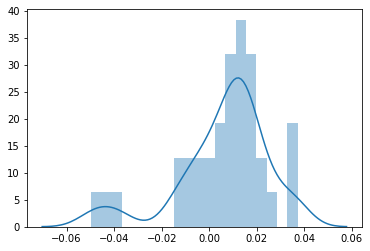

In [159]:
fig=plt.figure()
sns.distplot((y_home_audio-y_home_audio_train),bins=20)

In [160]:
home_audio_linear_test[home_audio_linear_test.columns]=scale.transform(home_audio_linear_test[home_audio_linear_test.columns])

In [161]:
x_home_audio_test=home_audio_linear_test.drop(['gmv'],axis=1)
y_home_audio_test=home_audio_linear_test['gmv']

In [162]:
x_home_audio_test=x_home_audio_test[x_home_audio_train.columns]

In [163]:
y_home_audio_pred=lr_home_audio.predict(x_home_audio_test)

In [164]:
r2_score(y_home_audio_test, y_home_audio_pred)

0.9792095695104058

In [165]:
mean_squared_error(y_home_audio_test, y_home_audio_pred)

0.0001868832487268863

#Starting Linear modelling for gaming dataset

In [166]:
#gaming dataset for linear model
gaming_linear_train,gaming_linear_test=train_test_split(gaming,train_size=0.75,test_size=0.25,random_state=100)

In [167]:
gaming_linear_train[gaming_linear_train.columns]=scale.fit_transform(gaming_linear_train[gaming_linear_train.columns])

In [168]:
x_gaming=gaming_linear_train.drop(['gmv'],axis=1)
y_gaming=gaming_linear_train['gmv']

In [169]:
lr.fit(x_gaming,y_gaming)

#using RFE method
rfe=RFE(lr,8)
rfe=rfe.fit(x_gaming,y_gaming)

In [170]:
x_gaming=x_gaming[x_gaming.columns[rfe.support_]]

In [171]:
x_gaming_train=sm.add_constant(x_gaming)

In [172]:
lr_gaming=sm.OLS(y_gaming,x_gaming_train).fit()

In [173]:
lr_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     91.71
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           5.97e-19
Time:                        00:21:04   Log-Likelihood:                 72.961
No. Observations:                  39   AIC:                            -127.9
Df Residuals:                      30   BIC:                            -113.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0272      0.033     -0.818      0.420      -0.095       0.041
units                         1.0333      0.052     19.911      0.000       0.927       1.139
TV_adstock                    0.4424      0.121      3.650      0.001       0.195       0.690
Digital_adstock               0.5720      0.224      2.553      0.016       0.114       1.030
Content_Marketing_adstock    -0.8714      0.228     -3.821      0.001      -1.337      -0.406
Online_Marketing_adstock      0.9212      0.328      2.809      0.009       0.251       1.591
Affiliates_adstock           -1.0176      0.305     -3.337      0.002      -1.640      -0.395
Radio_adstock                 0.4127      0.187      2.210      0.035       0.031       0.794
Other_adstock                -0.3486      0.174     -2.005      0.054      -0.704       0.006
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.623
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.712
Skew:                           0.202   Prob(JB):                        0.700
Kurtosis:                       2.476   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Online_Marketing_adstock,260.79
6,Affiliates_adstock,226.50
4,Content_Marketing_adstock,85.19
3,Digital_adstock,70.34
7,Radio_adstock,55.14
8,Other_adstock,49.91
2,TV_adstock,24.57
0,const,23.83
1,units,1.61


In [175]:
x_gaming=x_gaming.drop(['Online_Marketing_adstock'],axis=1)

In [176]:
x_gaming_train=sm.add_constant(x_gaming)
lr_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
lr_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     84.84
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.99e-18
Time:                        00:21:04   Log-Likelihood:                 68.409
No. Observations:                  39   AIC:                            -120.8
Df Residuals:                      31   BIC:                            -107.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0139      0.036     -0.382      0.705      -0.088       0.060
units                         1.0656      0.056     19.047      0.000       0.951       1.180
TV_adstock                    0.5097      0.131      3.880      0.001       0.242       0.778
Digital_adstock               0.5949      0.248      2.403      0.022       0.090       1.100
Content_Marketing_adstock    -0.7552      0.248     -3.046      0.005      -1.261      -0.250
Affiliates_adstock           -0.1828      0.075     -2.426      0.021      -0.337      -0.029
Radio_adstock                 0.6511      0.184      3.540      0.001       0.276       1.026
Other_adstock                -0.5927      0.166     -3.562      0.001      -0.932      -0.253
==============================================================================
Omnibus:                        2.373   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                2.204
Skew:                          -0.518   Prob(JB):                        0.332
Kurtosis:                       2.467   Cond. No.                         75.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,Content_Marketing_adstock,82.39
3,Digital_adstock,70.25
6,Radio_adstock,43.75
7,Other_adstock,37.43
2,TV_adstock,23.61
0,const,23.35
5,Affiliates_adstock,11.32
1,units,1.53


In [178]:
x_gaming=x_gaming.drop(['Content_Marketing_adstock'],axis=1)

In [179]:
x_gaming_train=sm.add_constant(x_gaming)
lr_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
lr_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     77.41
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.20e-17
Time:                        00:21:04   Log-Likelihood:                 63.304
No. Observations:                  39   AIC:                            -112.6
Df Residuals:                      32   BIC:                            -101.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0821      0.020      4.043      0.000       0.041       0.123
units                  1.0901      0.062     17.553      0.000       0.964       1.217
TV_adstock             0.2858      0.122      2.340      0.026       0.037       0.535
Digital_adstock       -0.1505      0.042     -3.592      0.001      -0.236      -0.065
Affiliates_adstock    -0.1461      0.083     -1.751      0.090      -0.316       0.024
Radio_adstock          0.2333      0.137      1.697      0.099      -0.047       0.513
Other_adstock         -0.2195      0.126     -1.737      0.092      -0.477       0.038
==============================================================================
Omnibus:                        5.349   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                2.147
Skew:                          -0.200   Prob(JB):                        0.342
Kurtosis:                       1.922   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Radio_adstock,19.42
6,Other_adstock,17.14
2,TV_adstock,16.21
4,Affiliates_adstock,11.03
0,const,5.79
3,Digital_adstock,1.60
1,units,1.50


In [181]:
x_gaming=x_gaming.drop(['Radio_adstock'],axis=1)

In [182]:
x_gaming_train=sm.add_constant(x_gaming)
lr_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
lr_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     87.34
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.74e-18
Time:                        00:21:04   Log-Likelihood:                 61.624
No. Observations:                  39   AIC:                            -111.2
Df Residuals:                      33   BIC:                            -101.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0769      0.021      3.725      0.001       0.035       0.119
units                  1.0924      0.064     17.113      0.000       0.963       1.222
TV_adstock             0.0997      0.055      1.805      0.080      -0.013       0.212
Digital_adstock       -0.1256      0.040     -3.112      0.004      -0.208      -0.043
Affiliates_adstock    -0.0310      0.050     -0.620      0.540      -0.133       0.071
Other_adstock         -0.0150      0.039     -0.385      0.703      -0.094       0.064
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.008
Skew:                          -0.029   Prob(JB):                        0.604
Kurtosis:                       2.215   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,5.66
4,Affiliates_adstock,3.74
2,TV_adstock,3.14
5,Other_adstock,1.55
1,units,1.50
3,Digital_adstock,1.40


In [184]:
x_gaming=x_gaming.drop(['Affiliates_adstock'],axis=1)

In [185]:
x_gaming_train=sm.add_constant(x_gaming)
lr_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
lr_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     111.1
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           5.07e-19
Time:                        00:21:04   Log-Likelihood:                 61.398
No. Observations:                  39   AIC:                            -112.8
Df Residuals:                      34   BIC:                            -104.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0727      0.019      3.758      0.001       0.033       0.112
units               1.0762      0.058     18.648      0.000       0.959       1.194
TV_adstock          0.0755      0.039      1.950      0.059      -0.003       0.154
Digital_adstock    -0.1243      0.040     -3.112      0.004      -0.205      -0.043
Other_adstock      -0.0211      0.037     -0.564      0.577      -0.097       0.055
==============================================================================
Omnibus:                        2.119   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.260
Skew:                          -0.076   Prob(JB):                        0.533
Kurtosis:                       2.133   Cond. No.                         8.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,5.07
2,TV_adstock,1.57
4,Other_adstock,1.45
3,Digital_adstock,1.40
1,units,1.25


In [187]:
x_gaming_train.corr()

,const,units,TV_adstock,Digital_adstock,Other_adstock
const,NaN,NaN,NaN,NaN,NaN
units,NaN,1.000000,0.408487,0.236756,0.215929
TV_adstock,NaN,0.408487,1.000000,0.311191,0.370338
Digital_adstock,NaN,0.236756,0.311191,1.000000,-0.262823
Other_adstock,NaN,0.215929,0.370338,-0.262823,1.000000


In [188]:
x_gaming=x_gaming.drop(['Other_adstock'],axis=1)

In [189]:
x_gaming_train=sm.add_constant(x_gaming)
lr_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
lr_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.41e-20
Time:                        00:21:04   Log-Likelihood:                 61.217
No. Observations:                  39   AIC:                            -114.4
Df Residuals:                      35   BIC:                            -107.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0729      0.019      3.801      0.001       0.034       0.112
units               1.0715      0.057     18.951      0.000       0.957       1.186
TV_adstock          0.0660      0.035      1.911      0.064      -0.004       0.136
Digital_adstock    -0.1143      0.035     -3.224      0.003      -0.186      -0.042
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.251
Skew:                          -0.022   Prob(JB):                        0.535
Kurtosis:                       2.124   Cond. No.                         8.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,5.07
2,TV_adstock,1.27
1,units,1.22
3,Digital_adstock,1.13


In [191]:
x_gaming_train.corr()

,const,units,TV_adstock,Digital_adstock
const,NaN,NaN,NaN,NaN
units,NaN,1.000000,0.408487,0.236756
TV_adstock,NaN,0.408487,1.000000,0.311191
Digital_adstock,NaN,0.236756,0.311191,1.000000


In [192]:
x_gaming=x_gaming.drop(['Digital_adstock'],axis=1)

In [193]:
x_gaming_train=sm.add_constant(x_gaming)
lr_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
lr_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.74e-19
Time:                        00:21:04   Log-Likelihood:                 56.145
No. Observations:                  39   AIC:                            -106.3
Df Residuals:                      36   BIC:                            -101.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0682      0.021      3.180      0.003       0.025       0.112
units          1.0485      0.063     16.647      0.000       0.921       1.176
TV_adstock     0.0391      0.038      1.039      0.306      -0.037       0.115
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.053
Skew:                           0.051   Prob(JB):                        0.974
Kurtosis:                       2.850   Cond. No.                         7.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,5.04
1,units,1.20
2,TV_adstock,1.20


In [195]:
y_gaming_train=lr_gaming.predict(x_gaming_train)

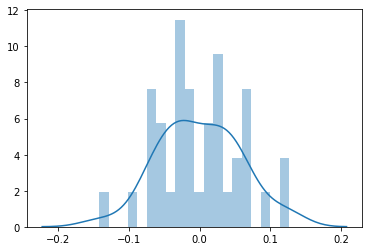

In [196]:
fig=plt.figure()
sns.distplot((y_gaming-y_gaming_train),bins=20)

In [197]:
gaming_linear_test[gaming_linear_test.columns]=scale.transform(gaming_linear_test[gaming_linear_test.columns])

In [198]:
x_gaming_test=gaming_linear_test.drop(['gmv'],axis=1)
y_gaming_test=gaming_linear_test['gmv']

In [199]:
x_gaming_test=sm.add_constant(x_gaming_test)

In [200]:
x_gaming_test=x_gaming_test[x_gaming_train.columns]

In [201]:
y_gaming_pred=lr_gaming.predict(x_gaming_test)

In [202]:
r2_score(y_gaming_test,y_gaming_pred)

0.9139996955701855

In [203]:
mean_squared_error(y_gaming_test,y_gaming_pred)

0.00292595332787891

### MULTIPLICATIVE MODELS

In [204]:
#Multiplicative model for camera dataset

In [205]:

#camera dataset
camera_multi_train,camera_multi_test=train_test_split(camera,train_size=0.8,test_size=0.2,random_state=100)

In [206]:
camera_multi_train[camera_multi_train.columns]=scale.fit_transform(camera_multi_train[camera_multi_train.columns])

In [207]:
camera_multi_train=np.log1p(camera_multi_train)

In [208]:
x_camera=camera_multi_train.drop(['gmv'],axis=1)
y_camera=camera_multi_train['gmv']

In [209]:
lr.fit(x_camera,y_camera)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_camera,y_camera)

In [210]:
x_camera=x_camera[x_camera.columns[rfe.support_]]

In [211]:
x_camera_train=sm.add_constant(x_camera)

In [212]:
multi_camera=sm.OLS(y_camera,x_camera_train).fit()
multi_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     323.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.25e-28
Time:                        00:21:07   Log-Likelihood:                 122.32
No. Observations:                  41   AIC:                            -226.6
Df Residuals:                      32   BIC:                            -211.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0249      0.016     -1.525      0.137      -0.058       0.008
units                        -0.2405      0.067     -3.567      0.001      -0.378      -0.103
sla                           0.0577      0.023      2.505      0.018       0.011       0.105
product_mrp                   1.2341      0.076     16.316      0.000       1.080       1.388
Digital_adstock               0.1810      0.094      1.925      0.063      -0.011       0.373
Content_Marketing_adstock     0.0930      0.073      1.272      0.213      -0.056       0.242
Online_Marketing_adstock      0.3166      0.159      1.995      0.055      -0.007       0.640
Affiliates_adstock           -0.2490      0.134     -1.855      0.073      -0.522       0.024
SEM_adstock                  -0.3544      0.120     -2.944      0.006      -0.600      -0.109
==============================================================================
Omnibus:                        8.356   Durbin-Watson:                   2.612
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.634
Skew:                          -0.784   Prob(JB):                       0.0220
Kurtosis:                       4.417   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
6,Online_Marketing_adstock,255.27
7,Affiliates_adstock,189.61
8,SEM_adstock,98.27
4,Digital_adstock,61.16
0,const,56.82
5,Content_Marketing_adstock,45.41
3,product_mrp,14.94
1,units,14.54
2,sla,1.15


In [214]:
x_camera=x_camera.drop(['Online_Marketing_adstock'],axis=1)

In [215]:
x_camera_train=sm.add_constant(x_camera)

In [216]:
multi_camera=sm.OLS(y_camera,x_camera_train).fit()
multi_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     339.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           7.61e-29
Time:                        00:21:07   Log-Likelihood:                 119.92
No. Observations:                  41   AIC:                            -223.8
Df Residuals:                      33   BIC:                            -210.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0072      0.014     -0.502      0.619      -0.036       0.022
units                        -0.2027      0.068     -2.999      0.005      -0.340      -0.065
sla                           0.0557      0.024      2.317      0.027       0.007       0.105
product_mrp                   1.2047      0.077     15.552      0.000       1.047       1.362
Digital_adstock               0.0408      0.065      0.626      0.536      -0.092       0.174
Content_Marketing_adstock     0.1343      0.073      1.835      0.076      -0.015       0.283
Affiliates_adstock            0.0169      0.016      1.037      0.307      -0.016       0.050
SEM_adstock                  -0.2050      0.098     -2.084      0.045      -0.405      -0.005
==============================================================================
Omnibus:                       12.549   Durbin-Watson:                   2.465
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.511
Skew:                          -1.058   Prob(JB):                      0.00116
Kurtosis:                       4.853   Cond. No.                         71.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
7,SEM_adstock,60.24
5,Content_Marketing_adstock,41.76
0,const,40.01
4,Digital_adstock,26.99
3,product_mrp,14.37
1,units,13.39
6,Affiliates_adstock,2.57
2,sla,1.15


In [218]:
x_camera=x_camera.drop(['SEM_adstock'],axis=1)

In [219]:
x_camera_train=sm.add_constant(x_camera)
multi_camera=sm.OLS(y_camera,x_camera_train).fit()
multi_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     359.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.92e-29
Time:                        00:21:07   Log-Likelihood:                 117.39
No. Observations:                  41   AIC:                            -220.8
Df Residuals:                      34   BIC:                            -208.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0056      0.015     -0.375      0.710      -0.036       0.025
units                        -0.1958      0.071     -2.768      0.009      -0.340      -0.052
sla                           0.0575      0.025      2.282      0.029       0.006       0.109
product_mrp                   1.1754      0.080     14.724      0.000       1.013       1.338
Digital_adstock              -0.0343      0.057     -0.602      0.551      -0.150       0.081
Content_Marketing_adstock     0.0274      0.055      0.500      0.620      -0.084       0.139
Affiliates_adstock            0.0035      0.016      0.221      0.827      -0.028       0.035
==============================================================================
Omnibus:                       10.186   Durbin-Watson:                   2.449
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.164
Skew:                          -0.894   Prob(JB):                      0.00621
Kurtosis:                       4.659   Cond. No.                         62.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,39.90
5,Content_Marketing_adstock,21.23
4,Digital_adstock,18.74
3,product_mrp,13.89
1,units,13.35
6,Affiliates_adstock,2.17
2,sla,1.15


In [221]:
x_camera_train=x_camera
multi_camera=sm.OLS(y_camera,x_camera_train).fit()
multi_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3374.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    7.98e-47
Time:                        00:21:07   Log-Likelihood:                          117.30
No. Observations:                  41   AIC:                                     -222.6
Df Residuals:                      35   BIC:                                     -212.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                        -0.1961      0.070     -2.808      0.008      -0.338      -0.054
sla                           0.0507      0.017      2.918      0.006       0.015       0.086
product_mrp                   1.1741      0.079     14.906      0.000       1.014       1.334
Digital_adstock              -0.0420      0.052     -0.802      0.428      -0.148       0.064
Content_Marketing_adstock     0.0352      0.050      0.704      0.486      -0.066       0.137
Affiliates_adstock            0.0018      0.015      0.119      0.906      -0.028       0.032
==============================================================================
Omnibus:                       10.226   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.355
Skew:                          -0.883   Prob(JB):                      0.00564
Kurtosis:                       4.715   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,product_mrp,115.74
0,units,107.09
3,Digital_adstock,30.10
4,Content_Marketing_adstock,24.08
1,sla,17.43
5,Affiliates_adstock,11.65


In [223]:
x_camera=x_camera.drop(['product_mrp'],axis=1)

In [224]:
x_camera_train=x_camera
multi_camera=sm.OLS(y_camera,x_camera_train).fit()
multi_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              560.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    4.49e-33
Time:                        00:21:08   Log-Likelihood:                          76.417
No. Observations:                  41   AIC:                                     -142.8
Df Residuals:                      36   BIC:                                     -134.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         0.7873      0.061     12.837      0.000       0.663       0.912
sla                           0.1469      0.043      3.407      0.002       0.059       0.234
Digital_adstock              -0.2334      0.136     -1.719      0.094      -0.509       0.042
Content_Marketing_adstock     0.2841      0.126      2.258      0.030       0.029       0.539
Affiliates_adstock           -0.0330      0.039     -0.840      0.406      -0.113       0.047
==============================================================================
Omnibus:                        3.263   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                1.556
Skew:                          -0.026   Prob(JB):                        0.459
Kurtosis:                       2.047   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Digital_adstock,28.29
3,Content_Marketing_adstock,21.39
1,sla,15.03
0,units,11.56
4,Affiliates_adstock,11.37


In [226]:
x_camera=x_camera.drop(['Digital_adstock'],axis=1)

In [227]:
x_camera_train=x_camera
multi_camera=sm.OLS(y_camera,x_camera_train).fit()
multi_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              664.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    6.70e-34
Time:                        00:21:08   Log-Likelihood:                          74.801
No. Observations:                  41   AIC:                                     -141.6
Df Residuals:                      37   BIC:                                     -134.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         0.7795      0.063     12.422      0.000       0.652       0.907
sla                           0.0980      0.033      2.948      0.006       0.031       0.165
Content_Marketing_adstock     0.0755      0.034      2.230      0.032       0.007       0.144
Affiliates_adstock           -0.0017      0.036     -0.048      0.962      -0.074       0.071
==============================================================================
Omnibus:                        6.352   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.451
Skew:                           0.239   Prob(JB):                        0.294
Kurtosis:                       1.902   Cond. No.                         8.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,11.49
3,Affiliates_adstock,8.93
1,sla,8.48
2,Content_Marketing_adstock,1.47


In [229]:
x_camera=x_camera.drop(['Affiliates_adstock'],axis=1)

In [230]:
x_camera_train=x_camera
multi_camera=sm.OLS(y_camera,x_camera_train).fit()
multi_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              910.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.03e-35
Time:                        00:21:08   Log-Likelihood:                          74.800
No. Observations:                  41   AIC:                                     -143.6
Df Residuals:                      38   BIC:                                     -138.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         0.7779      0.051     15.118      0.000       0.674       0.882
sla                           0.0975      0.031      3.097      0.004       0.034       0.161
Content_Marketing_adstock     0.0751      0.033      2.308      0.027       0.009       0.141
==============================================================================
Omnibus:                        6.566   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                2.478
Skew:                           0.236   Prob(JB):                        0.290
Kurtosis:                       1.892   Cond. No.                         6.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,7.93
1,sla,7.82
2,Content_Marketing_adstock,1.40


In [232]:
y_camera_train=multi_camera.predict(x_camera_train)

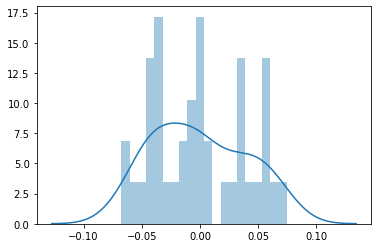

In [233]:
fig=plt.figure()
sns.distplot((y_camera-y_camera_train),bins=20)

In [234]:
camera_multi_test[camera_multi_test.columns]=scale.transform(camera_multi_test[camera_multi_test.columns])

In [235]:
x_camera_test=camera_multi_test.drop(['gmv'],axis=1)
y_camera_test=camera_multi_test['gmv']

In [236]:
x_camera_test=x_camera_test[x_camera_train.columns]

In [237]:
y_camera_pred=multi_camera.predict(x_camera_test)

In [238]:
r2_score(y_camera_test,y_camera_pred)

0.871714136335171

In [239]:
mean_squared_error(y_camera_test,y_camera_pred)

0.004321900519438734

#Multiplicative model for Home Audio

In [240]:
#home_audio dataset
home_audio_multi_train,home_audio_multi_test=train_test_split(home_audio,train_size=0.8,test_size=0.2,random_state=100)

In [241]:
home_audio_multi_train[home_audio_multi_train.columns]=scale.fit_transform(home_audio_multi_train[home_audio_multi_train.columns])

In [242]:
home_audio_multi_train=np.log1p(home_audio_multi_train)

In [243]:
x_home_audio=home_audio_multi_train.drop(['gmv'],axis=1)
y_home_audio=home_audio_multi_train['gmv']

In [244]:
lr.fit(x_home_audio,y_home_audio)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_home_audio,y_home_audio)

In [245]:
x_home_audio=x_home_audio[x_home_audio.columns[rfe.support_]]

In [246]:
x_home_audio_train=sm.add_constant(x_home_audio)
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1201.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.02e-35
Time:                        00:21:11   Log-Likelihood:                 146.81
No. Observations:                  39   AIC:                            -275.6
Df Residuals:                      30   BIC:                            -260.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0347      0.010      3.345      0.002       0.014       0.056
units                        0.3986      0.076      5.275      0.000       0.244       0.553
product_mrp                  0.5550      0.070      7.978      0.000       0.413       0.697
product_procurement_sla     -0.0542      0.014     -3.960      0.000      -0.082      -0.026
TV_adstock                   0.0163      0.012      1.319      0.197      -0.009       0.041
Digital_adstock              0.0082      0.043      0.192      0.849      -0.079       0.096
Online_Marketing_adstock     0.0949      0.091      1.047      0.303      -0.090       0.280
Affiliates_adstock          -0.1296      0.085     -1.532      0.136      -0.302       0.043
SEM_adstock                 -0.0179      0.054     -0.333      0.742      -0.128       0.092
==============================================================================
Omnibus:                        0.714   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.751
Skew:                           0.120   Prob(JB):                        0.687
Kurtosis:                       2.364   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
6,Online_Marketing_adstock,349.05
7,Affiliates_adstock,309.16
0,const,102.89
8,SEM_adstock,92.64
5,Digital_adstock,59.00
1,units,56.06
2,product_mrp,53.34
4,TV_adstock,5.11
3,product_procurement_sla,2.37


In [248]:
x_home_audio=x_home_audio.drop(['Online_Marketing_adstock'],axis=1)

In [249]:
x_home_audio_train=sm.add_constant(x_home_audio)
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           8.97e-37
Time:                        00:21:11   Log-Likelihood:                 146.11
No. Observations:                  39   AIC:                            -276.2
Df Residuals:                      31   BIC:                            -262.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0415      0.008      5.084      0.000       0.025       0.058
units                       0.3646      0.068      5.335      0.000       0.225       0.504
product_mrp                 0.5858      0.063      9.273      0.000       0.457       0.715
product_procurement_sla    -0.0598      0.013     -4.749      0.000      -0.085      -0.034
TV_adstock                  0.0096      0.011      0.906      0.372      -0.012       0.031
Digital_adstock            -0.0189      0.034     -0.553      0.584      -0.088       0.051
Affiliates_adstock         -0.0420      0.012     -3.394      0.002      -0.067      -0.017
SEM_adstock                 0.0253      0.035      0.729      0.471      -0.045       0.096
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.840
Skew:                           0.072   Prob(JB):                        0.657
Kurtosis:                       2.295   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,63.32
1,units,45.71
2,product_mrp,43.84
7,SEM_adstock,38.27
5,Digital_adstock,37.44
6,Affiliates_adstock,6.59
4,TV_adstock,3.73
3,product_procurement_sla,2.00


In [251]:
x_home_audio_train=x_home_audio
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4314.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    9.90e-46
Time:                        00:21:11   Log-Likelihood:                          134.29
No. Observations:                  39   AIC:                                     -254.6
Df Residuals:                      32   BIC:                                     -242.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
units                       0.6212      0.061     10.120      0.000       0.496       0.746
product_mrp                 0.3596      0.060      6.016      0.000       0.238       0.481
product_procurement_sla    -0.0079      0.010     -0.805      0.427      -0.028       0.012
TV_adstock                 -0.0029      0.014     -0.214      0.832      -0.031       0.025
Digital_adstock             0.0204      0.044      0.461      0.648      -0.070       0.111
Affiliates_adstock         -0.0105      0.014     -0.738      0.466      -0.040       0.019
SEM_adstock                -0.0099      0.045     -0.218      0.829      -0.102       0.082
==============================================================================
Omnibus:                        0.656   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.692
Skew:                          -0.029   Prob(JB):                        0.708
Kurtosis:                       2.350   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,136.30
1,product_mrp,99.81
6,SEM_adstock,70.28
4,Digital_adstock,66.05
5,Affiliates_adstock,33.01
3,TV_adstock,14.62
2,product_procurement_sla,3.76


In [253]:
x_home_audio=x_home_audio.drop(['units'],axis=1)

In [254]:
x_home_audio_train=x_home_audio
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1231.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.50e-37
Time:                        00:21:11   Log-Likelihood:                          106.30
No. Observations:                  39   AIC:                                     -200.6
Df Residuals:                      33   BIC:                                     -190.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9442      0.031     30.518      0.000       0.881       1.007
product_procurement_sla     0.0020      0.020      0.099      0.922      -0.038       0.042
TV_adstock                 -0.0297      0.027     -1.098      0.280      -0.085       0.025
Digital_adstock             0.2067      0.081      2.543      0.016       0.041       0.372
Affiliates_adstock          0.0576      0.025      2.265      0.030       0.006       0.109
SEM_adstock                -0.1865      0.084     -2.212      0.034      -0.358      -0.015
==============================================================================
Omnibus:                        2.571   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.053
Skew:                          -0.561   Prob(JB):                        0.358
Kurtosis:                       2.936   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,SEM_adstock,59.84
3,Digital_adstock,54.64
4,Affiliates_adstock,25.67
2,TV_adstock,14.07
0,product_mrp,6.57
1,product_procurement_sla,3.73


In [256]:
x_home_audio=x_home_audio.drop(['SEM_adstock'],axis=1)

In [257]:
x_home_audio_train=x_home_audio
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1325.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    6.35e-38
Time:                        00:21:11   Log-Likelihood:                          103.61
No. Observations:                  39   AIC:                                     -197.2
Df Residuals:                      34   BIC:                                     -188.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9528      0.032     29.396      0.000       0.887       1.019
product_procurement_sla     0.0268      0.017      1.560      0.128      -0.008       0.062
TV_adstock                 -0.0128      0.027     -0.468      0.643      -0.069       0.043
Digital_adstock             0.0317      0.020      1.603      0.118      -0.008       0.072
Affiliates_adstock          0.0247      0.022      1.134      0.265      -0.020       0.069
==============================================================================
Omnibus:                        7.548   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.299
Skew:                          -0.922   Prob(JB):                       0.0429
Kurtosis:                       3.691   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,Affiliates_adstock,16.89
2,TV_adstock,12.95
0,product_mrp,6.46
3,Digital_adstock,2.90
1,product_procurement_sla,2.53


In [259]:
x_home_audio=x_home_audio.drop(['TV_adstock'],axis=1)

In [260]:
x_home_audio_train=x_home_audio
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1694.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.60e-39
Time:                        00:21:11   Log-Likelihood:                          103.48
No. Observations:                  39   AIC:                                     -199.0
Df Residuals:                      35   BIC:                                     -192.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9563      0.031     30.677      0.000       0.893       1.020
product_procurement_sla     0.0266      0.017      1.570      0.125      -0.008       0.061
Digital_adstock             0.0279      0.018      1.566      0.126      -0.008       0.064
Affiliates_adstock          0.0161      0.012      1.386      0.174      -0.007       0.040
==============================================================================
Omnibus:                        7.884   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.640
Skew:                          -0.937   Prob(JB):                       0.0362
Kurtosis:                       3.756   Cond. No.                         7.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,6.12
3,Affiliates_adstock,4.94
1,product_procurement_sla,2.52
2,Digital_adstock,2.41


In [262]:
x_home_audio=x_home_audio.drop(['Affiliates_adstock'],axis=1)

In [263]:
x_home_audio_train=x_home_audio
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2202.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    7.97e-41
Time:                        00:21:12   Log-Likelihood:                          102.44
No. Observations:                  39   AIC:                                     -198.9
Df Residuals:                      36   BIC:                                     -193.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9827      0.025     39.310      0.000       0.932       1.033
product_procurement_sla     0.0350      0.016      2.177      0.036       0.002       0.068
Digital_adstock             0.0284      0.018      1.572      0.125      -0.008       0.065
==============================================================================
Omnibus:                       13.274   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.522
Skew:                          -1.325   Prob(JB):                      0.00116
Kurtosis:                       4.139   Cond. No.                         3.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,3.84
2,Digital_adstock,2.41
1,product_procurement_sla,2.21


In [265]:
x_home_audio=x_home_audio.drop(['Digital_adstock'],axis=1)

In [266]:
x_home_audio_train=x_home_audio
multi_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
multi_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3175.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    4.11e-42
Time:                        00:21:12   Log-Likelihood:                          101.15
No. Observations:                  39   AIC:                                     -198.3
Df Residuals:                      37   BIC:                                     -195.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 1.0084      0.019     52.374      0.000       0.969       1.047
product_procurement_sla     0.0327      0.016      2.003      0.052      -0.000       0.066
==============================================================================
Omnibus:                       13.345   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.685
Skew:                          -1.354   Prob(JB):                      0.00107
Kurtosis:                       4.044   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,2.19
1,product_procurement_sla,2.19


In [268]:
y_home_audio_train=multi_home_audio.predict(x_home_audio_train)

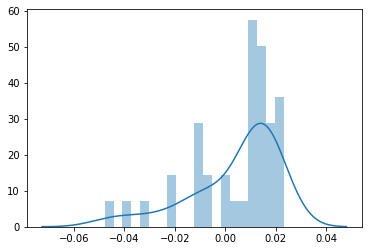

In [269]:
fig=plt.figure()
sns.distplot((y_home_audio-y_home_audio_train),bins=20)

In [270]:
home_audio_multi_test[home_audio_multi_test.columns]=scale.transform(home_audio_multi_test[home_audio_multi_test.columns])

In [271]:
home_audio_multi_test=np.log1p(home_audio_multi_test)

In [272]:
x_home_audio_test=home_audio_multi_test.drop(['gmv'],axis=1)
y_home_audio_test=home_audio_multi_test['gmv']

In [273]:
x_home_audio_test=x_home_audio_test[x_home_audio_train.columns]

In [274]:
y_home_audio_pred=multi_home_audio.predict(x_home_audio_test)

In [275]:
r2_score(y_home_audio_test,y_home_audio_pred)

0.9703689070740902

In [276]:
mean_squared_error(y_home_audio_test,y_home_audio_pred)

8.737497780512934e-05

In [277]:
#Multiplicative model for Gaming

In [278]:
#gaming dataset
gaming_multi_train,gaming_multi_test=train_test_split(gaming,train_size=0.7,test_size=0.3,random_state=100)

In [279]:
gaming_multi_train[gaming_multi_train.columns]=scale.fit_transform(gaming_multi_train[gaming_multi_train.columns])

In [280]:
gaming_multi_train=np.log1p(gaming_multi_train)

In [281]:
x_gaming=gaming_multi_train.drop(['gmv'],axis=1)
y_gaming=gaming_multi_train['gmv']

In [282]:
lr.fit(x_gaming,y_gaming)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_gaming,y_gaming)

In [283]:
x_gaming=x_gaming[x_gaming.columns[rfe.support_]]

In [284]:
x_gaming_train=sm.add_constant(x_gaming)
multi_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
multi_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     89.91
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           6.57e-18
Time:                        00:21:15   Log-Likelihood:                 84.758
No. Observations:                  37   AIC:                            -151.5
Df Residuals:                      28   BIC:                            -137.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1153      0.023      5.108      0.000       0.069       0.162
units                        1.2259      0.109     11.265      0.000       1.003       1.449
product_mrp                 -0.2312      0.107     -2.164      0.039      -0.450      -0.012
Digital_adstock             -1.0207      0.247     -4.129      0.000      -1.527      -0.514
Online_Marketing_adstock     0.6898      0.419      1.646      0.111      -0.169       1.548
Affiliates_adstock          -0.8597      0.372     -2.311      0.028      -1.622      -0.098
SEM_adstock                  0.9465      0.294      3.224      0.003       0.345       1.548
Radio_adstock               -0.3743      0.080     -4.705      0.000      -0.537      -0.211
Other_adstock                0.3675      0.078      4.693      0.000       0.207       0.528
==============================================================================
Omnibus:                        0.452   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.577
Skew:                          -0.014   Prob(JB):                        0.750
Kurtosis:                       2.389   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,Online_Marketing_adstock,421.41
5,Affiliates_adstock,346.10
6,SEM_adstock,132.32
3,Digital_adstock,94.19
0,const,23.79
8,Other_adstock,12.10
7,Radio_adstock,11.83
1,units,7.37
2,product_mrp,5.72


In [286]:
x_gaming=x_gaming.drop(['Online_Marketing_adstock'],axis=1)

In [287]:
x_gaming_train=sm.add_constant(x_gaming)
multi_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
multi_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     96.67
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.30e-18
Time:                        00:21:15   Log-Likelihood:                 83.049
No. Observations:                  37   AIC:                            -150.1
Df Residuals:                      29   BIC:                            -137.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1268      0.022      5.742      0.000       0.082       0.172
units                  1.3107      0.099     13.287      0.000       1.109       1.512
product_mrp           -0.2982      0.102     -2.935      0.006      -0.506      -0.090
Digital_adstock       -1.1302      0.245     -4.613      0.000      -1.631      -0.629
Affiliates_adstock    -0.2558      0.063     -4.044      0.000      -0.385      -0.126
SEM_adstock            1.1734      0.267      4.400      0.000       0.628       1.719
Radio_adstock         -0.3173      0.074     -4.305      0.000      -0.468      -0.167
Other_adstock          0.3150      0.074      4.280      0.000       0.164       0.465
==============================================================================
Omnibus:                        1.499   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.193
Skew:                           0.225   Prob(JB):                        0.551
Kurtosis:                       2.245   Cond. No.                         94.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,SEM_adstock,103.14
3,Digital_adstock,87.37
0,const,21.51
7,Other_adstock,10.09
6,Radio_adstock,9.59
4,Affiliates_adstock,9.45
1,units,5.72
2,product_mrp,4.89


In [289]:
x_gaming=x_gaming.drop(['SEM_adstock'],axis=1)

In [290]:
x_gaming_train=sm.add_constant(x_gaming)
multi_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
multi_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     67.96
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.11e-16
Time:                        00:21:15   Log-Likelihood:                 73.589
No. Observations:                  37   AIC:                            -133.2
Df Residuals:                      30   BIC:                            -121.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0534      0.018      2.907      0.007       0.016       0.091
units                  1.2260      0.123      9.981      0.000       0.975       1.477
product_mrp           -0.2028      0.126     -1.609      0.118      -0.460       0.055
Digital_adstock       -0.0627      0.043     -1.450      0.157      -0.151       0.026
Affiliates_adstock    -0.0141      0.040     -0.354      0.726      -0.095       0.067
Radio_adstock         -0.0512      0.053     -0.957      0.346      -0.160       0.058
Other_adstock          0.0494      0.053      0.924      0.363      -0.060       0.159
==============================================================================
Omnibus:                        1.551   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.294
Skew:                          -0.447   Prob(JB):                        0.524
Kurtosis:                       2.797   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,9.24
1,units,5.50
2,product_mrp,4.67
6,Other_adstock,3.30
5,Radio_adstock,3.13
4,Affiliates_adstock,2.33
3,Digital_adstock,1.68


In [292]:
x_gaming=x_gaming.drop(['Other_adstock'],axis=1)

In [293]:
x_gaming_train=sm.add_constant(x_gaming)
multi_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
multi_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     81.77
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           6.50e-17
Time:                        00:21:15   Log-Likelihood:                 73.070
No. Observations:                  37   AIC:                            -134.1
Df Residuals:                      31   BIC:                            -124.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0535      0.018      2.917      0.007       0.016       0.091
units                  1.2193      0.122      9.967      0.000       0.970       1.469
product_mrp           -0.2005      0.126     -1.595      0.121      -0.457       0.056
Digital_adstock       -0.0687      0.043     -1.613      0.117      -0.156       0.018
Affiliates_adstock    -0.0035      0.038     -0.093      0.927      -0.081       0.074
Radio_adstock         -0.0154      0.037     -0.418      0.679      -0.090       0.060
==============================================================================
Omnibus:                        1.826   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.325
Skew:                          -0.463   Prob(JB):                        0.515
Kurtosis:                       2.974   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,9.24
1,units,5.49
2,product_mrp,4.66
4,Affiliates_adstock,2.13
3,Digital_adstock,1.65
5,Radio_adstock,1.49


In [295]:
x_gaming=x_gaming.drop(['Digital_adstock'],axis=1)

In [296]:
x_gaming_train=sm.add_constant(x_gaming)
multi_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
multi_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     96.71
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.13e-17
Time:                        00:21:15   Log-Likelihood:                 71.578
No. Observations:                  37   AIC:                            -133.2
Df Residuals:                      32   BIC:                            -125.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0444      0.018      2.484      0.018       0.008       0.081
units                  1.2877      0.118     10.951      0.000       1.048       1.527
product_mrp           -0.2974      0.113     -2.629      0.013      -0.528      -0.067
Affiliates_adstock    -0.0275      0.036     -0.766      0.449      -0.101       0.046
Radio_adstock          0.0127      0.033      0.384      0.704      -0.055       0.080
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.511
Skew:                          -0.222   Prob(JB):                        0.775
Kurtosis:                       2.635   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,8.37
1,units,4.83
2,product_mrp,3.60
3,Affiliates_adstock,1.81
4,Radio_adstock,1.15


In [298]:
x_gaming=x_gaming.drop(['Radio_adstock'],axis=1)

In [299]:
x_gaming_train=sm.add_constant(x_gaming)
multi_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
multi_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.81e-18
Time:                        00:21:15   Log-Likelihood:                 71.493
No. Observations:                  37   AIC:                            -135.0
Df Residuals:                      33   BIC:                            -128.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0436      0.018      2.488      0.018       0.008       0.079
units                  1.2896      0.116     11.123      0.000       1.054       1.526
product_mrp           -0.2978      0.112     -2.667      0.012      -0.525      -0.071
Affiliates_adstock    -0.0241      0.034     -0.701      0.488      -0.094       0.046
==============================================================================
Omnibus:                        0.595   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.636
Skew:                          -0.272   Prob(JB):                        0.728
Kurtosis:                       2.659   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,8.24
1,units,4.82
2,product_mrp,3.60
3,Affiliates_adstock,1.70


In [301]:
x_gaming=x_gaming.drop(['Affiliates_adstock'],axis=1)

In [302]:
x_gaming_train=sm.add_constant(x_gaming)
multi_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
multi_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     201.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.43e-19
Time:                        00:21:15   Log-Likelihood:                 71.220
No. Observations:                  37   AIC:                            -136.4
Df Residuals:                      34   BIC:                            -131.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0416      0.017      2.424      0.021       0.007       0.076
units           1.2409      0.092     13.469      0.000       1.054       1.428
product_mrp    -0.2684      0.103     -2.614      0.013      -0.477      -0.060
==============================================================================
Omnibus:                        0.516   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.637
Skew:                          -0.229   Prob(JB):                        0.727
Kurtosis:                       2.549   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,8.02
1,units,3.09
2,product_mrp,3.09


In [304]:
y_gaming_train=multi_gaming.predict(x_gaming_train)

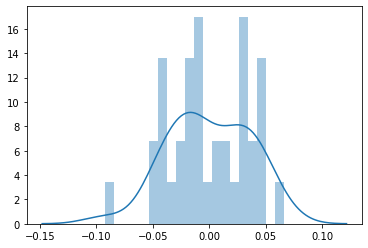

In [305]:
fig=plt.figure()
sns.distplot((y_gaming-y_gaming_train),bins=20)

In [306]:
gaming_multi_test[gaming_multi_test.columns]=scale.transform(gaming_multi_test[gaming_multi_test.columns])

In [307]:
gaming_multi_test=np.log1p(gaming_multi_test)

In [308]:
x_gaming_test=gaming_multi_test.drop(['gmv'],axis=1)
y_gaming_test=gaming_multi_test['gmv']

In [309]:
x_gaming_test=sm.add_constant(x_gaming_test)
x_gaming_test=x_gaming_test[x_gaming_train.columns]

In [310]:
y_gaming_pred=multi_gaming.predict(x_gaming_test)

In [311]:
r2_score(y_gaming_test,y_gaming_pred)

0.9199011036530907

In [312]:
mean_squared_error(y_gaming_test,y_gaming_pred)

0.0019633594787998978

### KOYCK MODELS

#Koyck model for camera dataset

In [313]:

#camera dataset
camera_koyck=camera
camera_koyck['gmv_lag']=camera_koyck['gmv'].shift(1)

In [314]:
camera=camera.drop(['gmv_lag'],axis=1)

In [315]:
camera_koyck=camera_koyck.fillna(0)

In [316]:
camera_koyck_train,camera_koyck_test=train_test_split(camera_koyck,train_size=0.7,test_size=0.3,random_state=100)

In [317]:
camera_koyck_train[camera_koyck_train.columns]=scale.fit_transform(camera_koyck_train[camera_koyck_train.columns])

In [318]:
x_camera=camera_koyck_train.drop(['gmv'],axis=1)
y_camera=camera_koyck_train['gmv']

In [319]:
lr.fit(x_camera,y_camera)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_camera,y_camera)

In [320]:
x_camera=x_camera[x_camera.columns[rfe.support_]]

In [321]:
x_camera_train=sm.add_constant(x_camera)
koyck_camera=sm.OLS(y_camera,x_camera_train).fit()
koyck_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     235.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           6.32e-23
Time:                        00:21:19   Log-Likelihood:                 92.983
No. Observations:                  36   AIC:                            -168.0
Df Residuals:                      27   BIC:                            -153.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0951      0.052     -1.829      0.078      -0.202       0.012
product_mrp                 0.9580      0.028     34.219      0.000       0.901       1.015
product_procurement_sla     0.0981      0.026      3.828      0.001       0.046       0.151
TV_adstock                  0.1637      0.113      1.450      0.158      -0.068       0.395
Digital_adstock             0.7464      0.487      1.532      0.137      -0.253       1.746
Sponsorship_adstock         0.0314      0.049      0.648      0.523      -0.068       0.131
SEM_adstock                -0.8359      0.561     -1.491      0.148      -1.986       0.314
Radio_adstock               0.3746      0.239      1.567      0.129      -0.116       0.865
Other_adstock              -0.3132      0.217     -1.444      0.160      -0.758       0.132
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.083
Skew:                          -0.007   Prob(JB):                        0.960
Kurtosis:                       2.766   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
6,SEM_adstock,1808.72
4,Digital_adstock,1390.07
7,Radio_adstock,356.08
8,Other_adstock,292.66
0,const,218.45
3,TV_adstock,72.87
5,Sponsorship_adstock,14.70
2,product_procurement_sla,1.63
1,product_mrp,1.52


In [323]:
x_camera=x_camera.drop(['SEM_adstock'],axis=1)

In [324]:
x_camera_train=sm.add_constant(x_camera)
koyck_camera=sm.OLS(y_camera,x_camera_train).fit()
koyck_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.09e-23
Time:                        00:21:19   Log-Likelihood:                 91.558
No. Observations:                  36   AIC:                            -167.1
Df Residuals:                      28   BIC:                            -154.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0218      0.017     -1.259      0.218      -0.057       0.014
product_mrp                 0.9554      0.029     33.469      0.000       0.897       1.014
product_procurement_sla     0.0833      0.024      3.451      0.002       0.034       0.133
TV_adstock                  0.0003      0.028      0.011      0.991      -0.056       0.057
Digital_adstock             0.0205      0.022      0.913      0.369      -0.025       0.066
Sponsorship_adstock        -0.0277      0.029     -0.968      0.341      -0.086       0.031
Radio_adstock               0.0218      0.035      0.626      0.537      -0.050       0.093
Other_adstock               0.0047      0.041      0.116      0.909      -0.079       0.089
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.229
Skew:                          -0.192   Prob(JB):                        0.892
Kurtosis:                       3.067   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,23.27
7,Other_adstock,9.97
6,Radio_adstock,7.24
5,Sponsorship_adstock,4.89
3,TV_adstock,4.19
4,Digital_adstock,2.82
1,product_mrp,1.51
2,product_procurement_sla,1.38


In [326]:
x_camera_train=x_camera
koyck_camera=sm.OLS(y_camera,x_camera_train).fit()
koyck_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1900.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    7.88e-37
Time:                        00:21:19   Log-Likelihood:                          90.567
No. Observations:                  36   AIC:                                     -167.1
Df Residuals:                      29   BIC:                                     -156.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9514      0.029     33.200      0.000       0.893       1.010
product_procurement_sla     0.0586      0.014      4.122      0.000       0.030       0.088
TV_adstock                 -0.0062      0.027     -0.226      0.823      -0.062       0.050
Digital_adstock             0.0272      0.022      1.238      0.226      -0.018       0.072
Sponsorship_adstock        -0.0277      0.029     -0.960      0.345      -0.087       0.031
Radio_adstock               0.0170      0.035      0.485      0.631      -0.055       0.088
Other_adstock               0.0083      0.041      0.202      0.841      -0.076       0.093
==============================================================================
Omnibus:                        0.883   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.204
Skew:                          -0.083   Prob(JB):                        0.903
Kurtosis:                       3.329   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,Sponsorship_adstock,14.82
2,TV_adstock,14.07
6,Other_adstock,12.95
0,product_mrp,10.04
5,Radio_adstock,8.92
1,product_procurement_sla,8.62
3,Digital_adstock,4.28


In [328]:
x_camera=x_camera.drop(['TV_adstock'],axis=1)

In [329]:
x_camera_train=x_camera
koyck_camera=sm.OLS(y_camera,x_camera_train).fit()
koyck_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2290.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.61e-38
Time:                        00:21:19   Log-Likelihood:                          90.535
No. Observations:                  36   AIC:                                     -169.1
Df Residuals:                      30   BIC:                                     -159.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9493      0.027     35.697      0.000       0.895       1.004
product_procurement_sla     0.0586      0.014      4.190      0.000       0.030       0.087
Digital_adstock             0.0281      0.021      1.325      0.195      -0.015       0.072
Sponsorship_adstock        -0.0317      0.023     -1.406      0.170      -0.078       0.014
Radio_adstock               0.0226      0.024      0.929      0.360      -0.027       0.072
Other_adstock               0.0007      0.023      0.030      0.976      -0.047       0.048
==============================================================================
Omnibus:                        0.590   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.091
Skew:                          -0.080   Prob(JB):                        0.956
Kurtosis:                       3.187   Cond. No.                         9.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
3,Sponsorship_adstock,9.33
0,product_mrp,8.93
1,product_procurement_sla,8.62
4,Radio_adstock,4.45
5,Other_adstock,4.23
2,Digital_adstock,4.12


In [331]:
x_camera=x_camera.drop(['Other_adstock'],axis=1)

In [332]:
x_camera_train=x_camera
koyck_camera=sm.OLS(y_camera,x_camera_train).fit()
koyck_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2839.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.85e-40
Time:                        00:21:19   Log-Likelihood:                          90.535
No. Observations:                  36   AIC:                                     -171.1
Df Residuals:                      31   BIC:                                     -163.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9492      0.026     36.358      0.000       0.896       1.002
product_procurement_sla     0.0587      0.014      4.316      0.000       0.031       0.086
Digital_adstock             0.0281      0.021      1.346      0.188      -0.014       0.071
Sponsorship_adstock        -0.0317      0.022     -1.430      0.163      -0.077       0.014
Radio_adstock               0.0231      0.014      1.626      0.114      -0.006       0.052
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.095
Skew:                          -0.083   Prob(JB):                        0.954
Kurtosis:                       3.188   Cond. No.                         8.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
3,Sponsorship_adstock,9.32
0,product_mrp,8.89
1,product_procurement_sla,8.41
2,Digital_adstock,4.12
4,Radio_adstock,1.58


In [334]:
x_camera=x_camera.drop(['Sponsorship_adstock'],axis=1)

In [335]:
x_camera_train=x_camera
koyck_camera=sm.OLS(y_camera,x_camera_train).fit()
koyck_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              3436.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.22e-41
Time:                        00:21:19   Log-Likelihood:                          89.385
No. Observations:                  36   AIC:                                     -170.8
Df Residuals:                      32   BIC:                                     -164.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9346      0.024     38.282      0.000       0.885       0.984
product_procurement_sla     0.0539      0.013      4.025      0.000       0.027       0.081
Digital_adstock             0.0076      0.015      0.493      0.625      -0.024       0.039
Radio_adstock               0.0289      0.014      2.083      0.045       0.001       0.057
==============================================================================
Omnibus:                        3.718   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.370
Skew:                          -0.511   Prob(JB):                        0.306
Kurtosis:                       3.731   Cond. No.                         6.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [336]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,product_procurement_sla,7.90
0,product_mrp,7.53
2,Digital_adstock,2.18
3,Radio_adstock,1.45


In [337]:
x_camera=x_camera.drop(['Digital_adstock'],axis=1)

In [338]:
x_camera_train=x_camera
koyck_camera=sm.OLS(y_camera,x_camera_train).fit()
koyck_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4689.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.84e-43
Time:                        00:21:19   Log-Likelihood:                          89.248
No. Observations:                  36   AIC:                                     -172.5
Df Residuals:                      33   BIC:                                     -167.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
product_mrp                 0.9361      0.024     39.072      0.000       0.887       0.985
product_procurement_sla     0.0560      0.013      4.455      0.000       0.030       0.082
Radio_adstock               0.0263      0.013      2.072      0.046       0.000       0.052
==============================================================================
Omnibus:                        3.620   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.296
Skew:                          -0.526   Prob(JB):                        0.317
Kurtosis:                       3.650   Cond. No.                         6.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,7.42
1,product_procurement_sla,7.12
2,Radio_adstock,1.25


In [340]:
y_camera_train=koyck_camera.predict(x_camera_train)

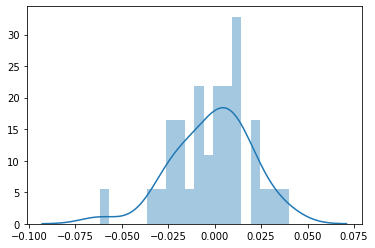

In [341]:
fig=plt.figure()
sns.distplot((y_camera-y_camera_train),bins=20)

In [342]:
camera_koyck_test[camera_koyck_test.columns]=scale.transform(camera_koyck_test[camera_koyck_test.columns])

In [343]:
x_camera_test=camera_koyck_test.drop(['gmv'],axis=1)
y_camera_test=camera_koyck_test['gmv']

In [344]:
x_camera_test=x_camera_test[x_camera_train.columns]

In [345]:
y_camera_pred=koyck_camera.predict(x_camera_test)

In [346]:
r2_score(y_camera_test,y_camera_pred)

0.9688544279204692

In [347]:
mean_squared_error(y_camera_test,y_camera_pred)

0.0009413895804857033

#Koyck model for home_audio dataset

In [348]:
#home_audio dataset
home_audio_koyck=home_audio
home_audio_koyck['gmv_lag']=home_audio_koyck['gmv'].shift(1)

In [349]:
home_audio=home_audio.drop(['gmv_lag'],axis=1)

In [350]:
home_audio_koyck=home_audio_koyck.fillna(0)

In [351]:
home_audio_koyck_train,home_audio_koyck_test=train_test_split(home_audio_koyck,train_size=0.7,test_size=0.3,random_state=100)

In [352]:
home_audio_koyck_train[home_audio_koyck_train.columns]=scale.fit_transform(home_audio_koyck_train[home_audio_koyck_train.columns])

In [353]:
x_home_audio=home_audio_koyck_train.drop(['gmv'],axis=1)
y_home_audio=home_audio_koyck_train['gmv']

In [354]:
lr.fit(x_home_audio,y_home_audio)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_home_audio,y_home_audio)

In [355]:
x_home_audio=x_home_audio[x_home_audio.columns[rfe.support_]]

In [356]:
x_home_audio_train=sm.add_constant(x_home_audio)
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     485.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.85e-25
Time:                        00:21:23   Log-Likelihood:                 85.971
No. Observations:                  34   AIC:                            -153.9
Df Residuals:                      25   BIC:                            -140.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0195      0.026      0.748      0.461      -0.034       0.073
units                         0.6313      0.070      8.997      0.000       0.487       0.776
product_mrp                   0.3579      0.068      5.233      0.000       0.217       0.499
Digital_adstock               0.2140      0.165      1.295      0.207      -0.126       0.554
Content_Marketing_adstock     0.2880      0.139      2.069      0.049       0.001       0.575
Online_Marketing_adstock      0.3340      0.157      2.125      0.044       0.010       0.658
Affiliates_adstock           -0.3408      0.134     -2.540      0.018      -0.617      -0.065
SEM_adstock                  -0.5229      0.199     -2.626      0.015      -0.933      -0.113
Radio_adstock                 0.0181      0.017      1.041      0.308      -0.018       0.054
==============================================================================
Omnibus:                        2.946   Durbin-Watson:                   2.924
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                1.702
Skew:                          -0.333   Prob(JB):                        0.427
Kurtosis:                       3.871   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
7,SEM_adstock,172.35
5,Online_Marketing_adstock,150.27
3,Digital_adstock,114.06
6,Affiliates_adstock,107.16
4,Content_Marketing_adstock,92.09
0,const,45.36
2,product_mrp,20.18
1,units,18.09
8,Radio_adstock,1.69


In [358]:
x_home_audio=x_home_audio.drop(['SEM_adstock'],axis=1)

In [359]:
x_home_audio_train=sm.add_constant(x_home_audio)
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     451.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.74e-25
Time:                        00:21:23   Log-Likelihood:                 81.830
No. Observations:                  34   AIC:                            -147.7
Df Residuals:                      26   BIC:                            -135.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0515      0.025      2.026      0.053      -0.001       0.104
units                         0.5755      0.074      7.770      0.000       0.423       0.728
product_mrp                   0.4266      0.070      6.095      0.000       0.283       0.570
Digital_adstock              -0.0942      0.129     -0.731      0.471      -0.359       0.171
Content_Marketing_adstock     0.1246      0.138      0.904      0.374      -0.159       0.408
Online_Marketing_adstock      0.0939      0.142      0.663      0.513      -0.197       0.385
Affiliates_adstock           -0.1583      0.127     -1.246      0.224      -0.420       0.103
Radio_adstock                 0.0141      0.019      0.735      0.469      -0.025       0.053
==============================================================================
Omnibus:                        2.962   Durbin-Watson:                   2.749
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.014
Skew:                          -0.588   Prob(JB):                        0.365
Kurtosis:                       3.199   Cond. No.                         92.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Online_Marketing_adstock,99.42
6,Affiliates_adstock,78.40
4,Content_Marketing_adstock,73.69
3,Digital_adstock,56.54
0,const,35.36
2,product_mrp,17.23
1,units,16.43
7,Radio_adstock,1.68


In [361]:
x_home_audio=x_home_audio.drop(['Radio_adstock'],axis=1)

In [362]:
x_home_audio_train=sm.add_constant(x_home_audio)
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     535.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           9.34e-27
Time:                        00:21:23   Log-Likelihood:                 81.481
No. Observations:                  34   AIC:                            -149.0
Df Residuals:                      27   BIC:                            -138.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0533      0.025      2.126      0.043       0.002       0.105
units                         0.5781      0.073      7.882      0.000       0.428       0.729
product_mrp                   0.4260      0.069      6.139      0.000       0.284       0.568
Digital_adstock              -0.1222      0.122     -1.001      0.326      -0.373       0.128
Content_Marketing_adstock     0.1452      0.134      1.085      0.288      -0.130       0.420
Online_Marketing_adstock      0.0938      0.140      0.668      0.510      -0.194       0.382
Affiliates_adstock           -0.1555      0.126     -1.235      0.227      -0.414       0.103
==============================================================================
Omnibus:                        2.619   Durbin-Watson:                   2.680
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.723
Skew:                          -0.543   Prob(JB):                        0.423
Kurtosis:                       3.189   Cond. No.                         90.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Online_Marketing_adstock,99.42
6,Affiliates_adstock,78.33
4,Content_Marketing_adstock,70.65
3,Digital_adstock,51.61
0,const,35.02
2,product_mrp,17.23
1,units,16.39


In [364]:
x_home_audio=x_home_audio.drop(['Online_Marketing_adstock'],axis=1)

In [365]:
x_home_audio_train=sm.add_constant(x_home_audio)
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     656.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.29e-28
Time:                        00:21:23   Log-Likelihood:                 81.202
No. Observations:                  34   AIC:                            -150.4
Df Residuals:                      28   BIC:                            -141.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0632      0.020      3.137      0.004       0.022       0.104
units                         0.5754      0.073      7.935      0.000       0.427       0.724
product_mrp                   0.4253      0.069      6.191      0.000       0.285       0.566
Digital_adstock              -0.1682      0.100     -1.686      0.103      -0.373       0.036
Content_Marketing_adstock     0.2067      0.096      2.147      0.041       0.009       0.404
Affiliates_adstock           -0.0724      0.020     -3.681      0.001      -0.113      -0.032
==============================================================================
Omnibus:                        2.563   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                1.641
Skew:                          -0.527   Prob(JB):                        0.440
Kurtosis:                       3.220   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,Content_Marketing_adstock,37.26
3,Digital_adstock,35.15
0,const,23.01
2,product_mrp,17.22
1,units,16.34
5,Affiliates_adstock,1.95


In [367]:
x_home_audio=x_home_audio.drop(['Content_Marketing_adstock'],axis=1)

In [368]:
x_home_audio_train=sm.add_constant(x_home_audio)
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     728.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.25e-28
Time:                        00:21:23   Log-Likelihood:                 78.611
No. Observations:                  34   AIC:                            -147.2
Df Residuals:                      29   BIC:                            -139.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0382      0.017      2.191      0.037       0.003       0.074
units                  0.5213      0.072      7.230      0.000       0.374       0.669
product_mrp            0.4832      0.067      7.214      0.000       0.346       0.620
Digital_adstock        0.0426      0.019      2.270      0.031       0.004       0.081
Affiliates_adstock    -0.0463      0.016     -2.824      0.008      -0.080      -0.013
==============================================================================
Omnibus:                        0.915   Durbin-Watson:                   2.584
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.953
Skew:                          -0.294   Prob(JB):                        0.621
Kurtosis:                       2.427   Cond. No.                         32.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [369]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,15.35
2,product_mrp,14.56
1,units,14.37
4,Affiliates_adstock,1.20
3,Digital_adstock,1.11


In [370]:
x_home_audio_train=x_home_audio
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3709.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    5.98e-40
Time:                        00:21:23   Log-Likelihood:                          76.007
No. Observations:                  34   AIC:                                     -144.0
Df Residuals:                      30   BIC:                                     -137.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
units                  0.6344      0.053     11.869      0.000       0.525       0.744
product_mrp            0.3918      0.056      7.046      0.000       0.278       0.505
Digital_adstock        0.0397      0.020      2.000      0.055      -0.001       0.080
Affiliates_adstock    -0.0267      0.015     -1.832      0.077      -0.056       0.003
==============================================================================
Omnibus:                        1.328   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                1.240
Skew:                          -0.426   Prob(JB):                        0.538
Kurtosis:                       2.613   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,47.35
1,product_mrp,36.59
3,Affiliates_adstock,5.51
2,Digital_adstock,1.80


In [372]:
x_home_audio=x_home_audio.drop(['units'],axis=1)

In [373]:
x_home_audio_train=x_home_audio
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              888.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    3.92e-30
Time:                        00:21:23   Log-Likelihood:                          46.431
No. Observations:                  34   AIC:                                     -86.86
Df Residuals:                      31   BIC:                                     -82.28
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
product_mrp            1.0091      0.046     21.887      0.000       0.915       1.103
Digital_adstock        0.0975      0.045      2.156      0.039       0.005       0.190
Affiliates_adstock     0.0504      0.031      1.646      0.110      -0.012       0.113
==============================================================================
Omnibus:                        1.633   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                0.650
Skew:                          -0.178   Prob(JB):                        0.723
Kurtosis:                       3.576   Cond. No.                         4.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,4.56
2,Affiliates_adstock,4.41
1,Digital_adstock,1.69


In [375]:
x_home_audio=x_home_audio.drop(['Affiliates_adstock'],axis=1)

In [376]:
x_home_audio_train=x_home_audio
koyck_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
koyck_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1264.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    3.55e-31
Time:                        00:21:23   Log-Likelihood:                          45.006
No. Observations:                  34   AIC:                                     -86.01
Df Residuals:                      32   BIC:                                     -82.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
product_mrp         1.0698      0.028     37.647      0.000       1.012       1.128
Digital_adstock     0.1095      0.046      2.392      0.023       0.016       0.203
==============================================================================
Omnibus:                       10.187   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.077
Skew:                          -1.091   Prob(JB):                       0.0107
Kurtosis:                       4.282   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,product_mrp,1.65
1,Digital_adstock,1.65


In [378]:
y_home_audio_train=koyck_home_audio.predict(x_home_audio_train)

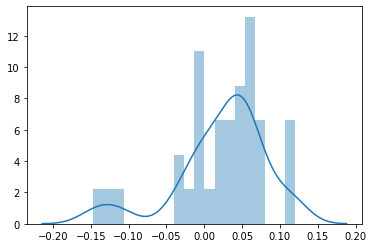

In [379]:
fig=plt.figure()
sns.distplot((y_home_audio-y_home_audio_train),bins=20)

In [380]:
home_audio_koyck_test[home_audio_koyck_test.columns]=scale.transform(home_audio_koyck_test[home_audio_koyck_test.columns])

In [381]:
x_home_audio_test=home_audio_koyck_test.drop(['gmv'],axis=1)
y_home_audio_test=home_audio_koyck_test['gmv']

In [382]:
x_home_audio_test=x_home_audio_test[x_home_audio_train.columns]

In [383]:
y_home_audio_pred=koyck_home_audio.predict(x_home_audio_test)

In [384]:
r2_score(y_home_audio_test,y_home_audio_pred)

0.9964888689328107

In [385]:
mean_squared_error(y_home_audio_test,y_home_audio_pred)

0.0019167525404328693

#Koyck model fr gaming dataset

In [386]:
#gaming dataset
gaming_koyck=gaming
gaming_koyck['gmv_lag']=gaming_koyck['gmv'].shift(1)

In [387]:
gaming=gaming.drop(['gmv_lag'],axis=1)

In [388]:
gaming_koyck=gaming_koyck.fillna(0)

In [389]:
gaming_koyck_train,gaming_koyck_test=train_test_split(gaming_koyck,train_size=0.7,test_size=0.3,random_state=100)

In [390]:
gaming_koyck_train[gaming_koyck_train.columns]=scale.fit_transform(gaming_koyck_train[gaming_koyck_train.columns])

In [391]:
x_gaming=gaming_koyck_train.drop(['gmv'],axis=1)
y_gaming=gaming_koyck_train['gmv']

In [392]:
lr.fit(x_gaming,y_gaming)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_gaming,y_gaming)

In [393]:
x_gaming=x_gaming[x_gaming.columns[rfe.support_]]

In [394]:
x_gaming_train=sm.add_constant(x_gaming)
koyck_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
koyck_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           3.61e-19
Time:                        00:21:27   Log-Likelihood:                 75.462
No. Observations:                  37   AIC:                            -132.9
Df Residuals:                      28   BIC:                            -118.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0070      0.019      0.363      0.720      -0.032       0.046
units                         1.2679      0.095     13.294      0.000       1.073       1.463
product_mrp                  -0.2737      0.096     -2.853      0.008      -0.470      -0.077
TV_adstock                    0.2579      0.053      4.849      0.000       0.149       0.367
Content_Marketing_adstock    -0.7995      0.174     -4.605      0.000      -1.155      -0.444
Online_Marketing_adstock      0.9147      0.232      3.944      0.000       0.440       1.390
Affiliates_adstock           -1.0549      0.237     -4.446      0.000      -1.541      -0.569
SEM_adstock                   0.6159      0.189      3.264      0.003       0.229       1.003
Radio_adstock                 0.0753      0.030      2.497      0.019       0.014       0.137
==============================================================================
Omnibus:                        1.082   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                1.032
Skew:                           0.371   Prob(JB):                        0.597
Kurtosis:                       2.655   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [395]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
6,Affiliates_adstock,171.40
5,Online_Marketing_adstock,163.17
7,SEM_adstock,68.38
4,Content_Marketing_adstock,67.08
0,const,10.47
1,units,6.75
3,TV_adstock,6.13
2,product_mrp,5.91
8,Radio_adstock,1.96


In [396]:
x_gaming_train=x_gaming
koyck_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
koyck_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              761.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.47e-31
Time:                        00:21:27   Log-Likelihood:                          75.375
No. Observations:                  37   AIC:                                     -134.8
Df Residuals:                      29   BIC:                                     -121.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.2804      0.088     14.623      0.000       1.101       1.459
product_mrp                  -0.2831      0.091     -3.113      0.004      -0.469      -0.097
TV_adstock                    0.2596      0.052      4.976      0.000       0.153       0.366
Content_Marketing_adstock    -0.8335      0.144     -5.798      0.000      -1.128      -0.540
Online_Marketing_adstock      0.9246      0.227      4.077      0.000       0.461       1.388
Affiliates_adstock           -1.0645      0.232     -4.583      0.000      -1.539      -0.589
SEM_adstock                   0.6518      0.158      4.121      0.000       0.328       0.975
Radio_adstock                 0.0758      0.030      2.554      0.016       0.015       0.137
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.354
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.864
Skew:                           0.318   Prob(JB):                        0.649
Kurtosis:                       2.605   Cond. No.                         69.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [397]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Affiliates_adstock,832.11
4,Online_Marketing_adstock,814.39
6,SEM_adstock,81.91
3,Content_Marketing_adstock,60.75
0,units,28.76
2,TV_adstock,19.93
1,product_mrp,10.39
7,Radio_adstock,2.40


In [398]:
x_gaming=x_gaming.drop(['Online_Marketing_adstock'],axis=1)

In [399]:
x_gaming_train=x_gaming
koyck_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
koyck_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              570.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    4.17e-30
Time:                        00:21:27   Log-Likelihood:                          66.992
No. Observations:                  37   AIC:                                     -120.0
Df Residuals:                      30   BIC:                                     -108.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.4001      0.102     13.762      0.000       1.192       1.608
product_mrp                  -0.3807      0.108     -3.517      0.001      -0.602      -0.160
TV_adstock                    0.1296      0.051      2.545      0.016       0.026       0.234
Content_Marketing_adstock    -0.7523      0.176     -4.285      0.000      -1.111      -0.394
Affiliates_adstock           -0.1356      0.056     -2.434      0.021      -0.249      -0.022
SEM_adstock                   0.7734      0.192      4.037      0.000       0.382       1.165
Radio_adstock                 0.0662      0.036      1.813      0.080      -0.008       0.141
==============================================================================
Omnibus:                        2.101   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.921
Skew:                          -0.526   Prob(JB):                        0.383
Kurtosis:                       2.627   Cond. No.                         36.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [400]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,SEM_adstock,79.00
3,Content_Marketing_adstock,59.59
4,Affiliates_adstock,31.49
0,units,25.53
2,TV_adstock,12.48
1,product_mrp,9.67
6,Radio_adstock,2.38


In [401]:
x_gaming=x_gaming.drop(['TV_adstock'],axis=1)

In [402]:
x_gaming_train=x_gaming
koyck_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
koyck_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              564.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    3.12e-30
Time:                        00:21:27   Log-Likelihood:                          63.377
No. Observations:                  37   AIC:                                     -114.8
Df Residuals:                      31   BIC:                                     -105.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.3546      0.109     12.469      0.000       1.133       1.576
product_mrp                  -0.3389      0.116     -2.920      0.006      -0.576      -0.102
Content_Marketing_adstock    -0.7201      0.190     -3.791      0.001      -1.107      -0.333
Affiliates_adstock           -0.0238      0.037     -0.640      0.527      -0.100       0.052
SEM_adstock                   0.7328      0.207      3.539      0.001       0.310       1.155
Radio_adstock                 0.0185      0.034      0.546      0.589      -0.051       0.088
==============================================================================
Omnibus:                        8.130   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.049
Skew:                          -0.820   Prob(JB):                       0.0295
Kurtosis:                       4.371   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [403]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,SEM_adstock,78.45
2,Content_Marketing_adstock,59.28
0,units,24.74
3,Affiliates_adstock,11.90
1,product_mrp,9.45
5,Radio_adstock,1.75


In [404]:
x_gaming=x_gaming.drop(['Radio_adstock'],axis=1)

In [405]:
x_gaming_train=x_gaming
koyck_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
koyck_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              692.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.30e-31
Time:                        00:21:27   Log-Likelihood:                          63.200
No. Observations:                  37   AIC:                                     -116.4
Df Residuals:                      32   BIC:                                     -108.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.3489      0.107     12.613      0.000       1.131       1.567
product_mrp                  -0.3286      0.113     -2.902      0.007      -0.559      -0.098
Content_Marketing_adstock    -0.7014      0.185     -3.796      0.001      -1.078      -0.325
Affiliates_adstock           -0.0146      0.033     -0.445      0.659      -0.081       0.052
SEM_adstock                   0.7043      0.198      3.554      0.001       0.301       1.108
==============================================================================
Omnibus:                       10.093   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.541
Skew:                          -0.958   Prob(JB):                      0.00848
Kurtosis:                       4.587   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [406]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,SEM_adstock,73.44
2,Content_Marketing_adstock,57.34
0,units,24.51
3,Affiliates_adstock,9.44
1,product_mrp,9.20


In [407]:
x_gaming=x_gaming.drop(['SEM_adstock'],axis=1)

In [408]:
x_gaming_train=x_gaming
koyck_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
koyck_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              637.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    9.76e-31
Time:                        00:21:27   Log-Likelihood:                          57.045
No. Observations:                  37   AIC:                                     -106.1
Df Residuals:                      33   BIC:                                     -99.65
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.4811      0.117     12.703      0.000       1.244       1.718
product_mrp                  -0.4062      0.129     -3.144      0.004      -0.669      -0.143
Content_Marketing_adstock    -0.0554      0.039     -1.438      0.160      -0.134       0.023
Affiliates_adstock            0.0091      0.037      0.244      0.809      -0.067       0.085
==============================================================================
Omnibus:                        7.449   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.273
Skew:                          -0.765   Prob(JB):                       0.0434
Kurtosis:                       4.315   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,21.55
3,Affiliates_adstock,9.05
1,product_mrp,8.86
2,Content_Marketing_adstock,1.85


In [410]:
x_gaming_train.corr()

,units,product_mrp,Content_Marketing_adstock,Affiliates_adstock
units,1.000000,0.845425,0.285243,0.507022
product_mrp,0.845425,1.000000,0.410294,0.241775
Content_Marketing_adstock,0.285243,0.410294,1.000000,0.315751
Affiliates_adstock,0.507022,0.241775,0.315751,1.000000


In [411]:
x_gaming=x_gaming.drop(['product_mrp'],axis=1)

In [412]:
x_gaming_train=x_gaming
koyck_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
koyck_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              671.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.59e-30
Time:                        00:21:27   Log-Likelihood:                          52.199
No. Observations:                  37   AIC:                                     -98.40
Df Residuals:                      34   BIC:                                     -93.56
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.1629      0.065     17.886      0.000       1.031       1.295
Content_Marketing_adstock    -0.1123      0.038     -2.937      0.006      -0.190      -0.035
Affiliates_adstock            0.0834      0.032      2.577      0.014       0.018       0.149
==============================================================================
Omnibus:                        3.580   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                2.733
Skew:                          -0.663   Prob(JB):                        0.255
Kurtosis:                       3.116   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [413]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Affiliates_adstock,5.41
0,units,5.31
1,Content_Marketing_adstock,1.44


In [414]:
y_gaming_train=koyck_gaming.predict(x_gaming_train)

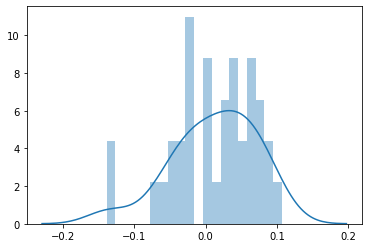

In [415]:
fig=plt.figure()
sns.distplot((y_gaming-y_gaming_train),bins=20)

In [416]:
gaming_koyck_test[gaming_koyck_test.columns]=scale.transform(gaming_koyck_test[gaming_koyck_test.columns])

In [417]:
x_gaming_test=gaming_koyck_test.drop(['gmv'],axis=1)
y_gaming_test=gaming_koyck_test['gmv']

In [418]:
x_gaming_test=x_gaming_test[x_gaming_train.columns]

In [419]:
y_gaming_pred=koyck_gaming.predict(x_gaming_test)

In [420]:
r2_score(y_gaming_test,y_gaming_pred)

0.9038810343488494

In [421]:
mean_squared_error(y_gaming_test,y_gaming_pred)

0.0037034163672736552

### DISTRIBUTED LAG MODEL

#Dist lag model for camera dataset

In [422]:

#camera dataset
camera_dislag=camera
camera_dislag['gmv_lag']=camera_dislag['gmv'].shift(1)
camera_dislag['units_lag']=camera_dislag['units'].shift(1)
camera_dislag['Digital_adstock_lag']=camera_dislag['Digital_adstock'].shift(1)

In [423]:
camera=camera.drop(['gmv_lag','units_lag','Digital_adstock_lag'],axis=1)

In [424]:
camera_dislag=camera_dislag.fillna(0)

In [425]:
camera_dislag_train,camera_dislag_test=train_test_split(camera_dislag,train_size=0.7,test_size=0.3,random_state=100)

In [426]:
camera_dislag_train[camera_dislag_train.columns]=scale.fit_transform(camera_dislag_train[camera_dislag_train.columns])

In [427]:
x_camera=camera_dislag_train.drop(['gmv'],axis=1)
y_camera=camera_dislag_train['gmv']

In [428]:
lr.fit(x_camera,y_camera)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_camera,y_camera)

In [429]:
x_camera=x_camera[x_camera.columns[rfe.support_]]

In [430]:
x_camera_train=sm.add_constant(x_camera)
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     310.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.60e-24
Time:                        00:21:31   Log-Likelihood:                 97.893
No. Observations:                  36   AIC:                            -177.8
Df Residuals:                      27   BIC:                            -163.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0585      0.029     -2.015      0.054      -0.118       0.001
units                      -0.1999      0.067     -3.003      0.006      -0.337      -0.063
product_mrp                 1.1804      0.078     15.134      0.000       1.020       1.340
product_procurement_sla     0.0679      0.023      2.917      0.007       0.020       0.116
TV_adstock                  0.1406      0.070      2.011      0.054      -0.003       0.284
Digital_adstock             0.5759      0.257      2.243      0.033       0.049       1.103
SEM_adstock                -0.6370      0.284     -2.244      0.033      -1.220      -0.054
Radio_adstock               0.2909      0.131      2.220      0.035       0.022       0.560
Other_adstock              -0.2405      0.126     -1.910      0.067      -0.499       0.018
==============================================================================
Omnibus:                        2.927   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                1.886
Skew:                          -0.537   Prob(JB):                        0.389
Kurtosis:                       3.322   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [431]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
6,SEM_adstock,609.46
5,Digital_adstock,506.59
7,Radio_adstock,140.50
8,Other_adstock,129.47
0,const,89.44
4,TV_adstock,36.78
2,product_mrp,15.48
1,units,13.91
3,product_procurement_sla,1.77


In [432]:
x_camera=x_camera.drop(['SEM_adstock'],axis=1)

In [433]:
x_camera_train=sm.add_constant(x_camera)
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     309.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           8.72e-25
Time:                        00:21:31   Log-Likelihood:                 94.816
No. Observations:                  36   AIC:                            -173.6
Df Residuals:                      28   BIC:                            -161.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0043      0.017     -0.250      0.804      -0.040       0.031
units                      -0.1828      0.071     -2.584      0.015      -0.328      -0.038
product_mrp                 1.1555      0.083     13.993      0.000       0.986       1.325
product_procurement_sla     0.0547      0.024      2.269      0.031       0.005       0.104
TV_adstock                 -0.0104      0.020     -0.511      0.613      -0.052       0.031
Digital_adstock             0.0009      0.016      0.058      0.954      -0.032       0.034
Radio_adstock               0.0038      0.030      0.125      0.901      -0.058       0.065
Other_adstock               0.0337      0.032      1.043      0.306      -0.033       0.100
==============================================================================
Omnibus:                       13.386   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.027
Skew:                          -1.067   Prob(JB):                     0.000331
Kurtosis:                       5.476   Cond. No.                         48.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [434]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,27.54
2,product_mrp,15.17
1,units,13.73
7,Other_adstock,7.48
6,Radio_adstock,6.43
4,TV_adstock,2.72
5,Digital_adstock,1.73
3,product_procurement_sla,1.65


In [435]:
x_camera_train=x_camera
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2402.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.66e-38
Time:                        00:21:31   Log-Likelihood:                          94.775
No. Observations:                  36   AIC:                                     -175.6
Df Residuals:                      29   BIC:                                     -164.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
units                      -0.1898      0.064     -2.967      0.006      -0.321      -0.059
product_mrp                 1.1626      0.076     15.229      0.000       1.006       1.319
product_procurement_sla     0.0495      0.013      3.939      0.000       0.024       0.075
TV_adstock                 -0.0113      0.020     -0.573      0.571      -0.052       0.029
Digital_adstock             0.0018      0.015      0.119      0.906      -0.030       0.033
Radio_adstock               0.0027      0.029      0.093      0.927      -0.057       0.062
Other_adstock               0.0347      0.032      1.097      0.282      -0.030       0.099
==============================================================================
Omnibus:                       13.685   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.870
Skew:                          -1.071   Prob(JB):                     0.000217
Kurtosis:                       5.581   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,product_mrp,90.03
0,units,77.84
6,Other_adstock,9.63
3,TV_adstock,9.18
2,product_procurement_sla,8.53
5,Radio_adstock,7.86
4,Digital_adstock,2.65


In [437]:
x_camera=x_camera.drop(['product_mrp'],axis=1)

In [438]:
x_camera_train=x_camera
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              317.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    9.38e-26
Time:                        00:21:32   Log-Likelihood:                          55.230
No. Observations:                  36   AIC:                                     -98.46
Df Residuals:                      30   BIC:                                     -88.96
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
units                       0.7289      0.063     11.614      0.000       0.601       0.857
product_procurement_sla     0.1201      0.034      3.484      0.002       0.050       0.191
TV_adstock                 -0.0163      0.058     -0.280      0.782      -0.135       0.102
Digital_adstock             0.0530      0.044      1.196      0.241      -0.037       0.143
Radio_adstock               0.0827      0.085      0.977      0.337      -0.090       0.256
Other_adstock              -0.0611      0.091     -0.668      0.509      -0.248       0.126
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.613
Skew:                           0.653   Prob(JB):                        0.271
Kurtosis:                       2.808   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [439]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Other_adstock,9.25
2,TV_adstock,9.17
0,units,8.61
4,Radio_adstock,7.61
1,product_procurement_sla,7.37
3,Digital_adstock,2.52


In [440]:
x_camera=x_camera.drop(['TV_adstock'],axis=1)

In [441]:
x_camera_train=x_camera
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              393.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    4.64e-27
Time:                        00:21:32   Log-Likelihood:                          55.183
No. Observations:                  36   AIC:                                     -100.4
Df Residuals:                      31   BIC:                                     -92.45
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
units                       0.7199      0.053     13.591      0.000       0.612       0.828
product_procurement_sla     0.1184      0.033      3.544      0.001       0.050       0.186
Digital_adstock             0.0483      0.040      1.196      0.241      -0.034       0.131
Radio_adstock               0.0985      0.062      1.579      0.124      -0.029       0.226
Other_adstock              -0.0800      0.061     -1.318      0.197      -0.204       0.044
==============================================================================
Omnibus:                        2.925   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.492
Skew:                           0.637   Prob(JB):                        0.288
Kurtosis:                       2.808   Cond. No.                         8.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,product_procurement_sla,7.12
0,units,6.32
3,Radio_adstock,4.25
4,Other_adstock,4.20
2,Digital_adstock,2.16


In [443]:
x_camera=x_camera.drop(['product_procurement_sla'],axis=1)

In [444]:
x_camera_train=x_camera
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              358.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    4.42e-26
Time:                        00:21:32   Log-Likelihood:                          49.059
No. Observations:                  36   AIC:                                     -90.12
Df Residuals:                      32   BIC:                                     -83.78
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
units               0.8689      0.038     23.122      0.000       0.792       0.945
Digital_adstock     0.1054      0.043      2.443      0.020       0.018       0.193
Radio_adstock       0.0975      0.073      1.341      0.189      -0.051       0.246
Other_adstock      -0.0616      0.071     -0.873      0.389      -0.205       0.082
==============================================================================
Omnibus:                        1.525   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.125
Skew:                           0.169   Prob(JB):                        0.570
Kurtosis:                       2.203   Cond. No.                         4.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Radio_adstock,4.25
3,Other_adstock,4.17
0,units,2.34
1,Digital_adstock,1.81


In [446]:
x_camera=x_camera.drop(['Other_adstock'],axis=1)

In [447]:
x_camera_train=x_camera
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              481.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.68e-27
Time:                        00:21:32   Log-Likelihood:                          48.636
No. Observations:                  36   AIC:                                     -91.27
Df Residuals:                      33   BIC:                                     -86.52
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
units               0.8644      0.037     23.306      0.000       0.789       0.940
Digital_adstock     0.1056      0.043      2.455      0.020       0.018       0.193
Radio_adstock       0.0459      0.042      1.087      0.285      -0.040       0.132
==============================================================================
Omnibus:                        3.710   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                1.910
Skew:                           0.269   Prob(JB):                        0.385
Kurtosis:                       2.008   Cond. No.                         2.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [448]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,2.29
1,Digital_adstock,1.81
2,Radio_adstock,1.44


In [449]:
x_camera=x_camera.drop(['Radio_adstock'],axis=1)

In [450]:
x_camera_train=x_camera
dislag_camera=sm.OLS(y_camera,x_camera_train).fit()
dislag_camera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              717.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.57e-28
Time:                        00:21:32   Log-Likelihood:                          48.002
No. Observations:                  36   AIC:                                     -92.00
Df Residuals:                      34   BIC:                                     -88.84
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
units               0.8867      0.031     28.610      0.000       0.824       0.950
Digital_adstock     0.0893      0.040      2.209      0.034       0.007       0.171
==============================================================================
Omnibus:                        6.599   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                2.390
Skew:                           0.248   Prob(JB):                        0.303
Kurtosis:                       1.840   Cond. No.                         2.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [451]:
vif=pd.DataFrame()

vif['Features']=x_camera_train.columns
vif['VIF']=[variance_inflation_factor(x_camera_train.values,i) for i in range(x_camera_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,1.59
1,Digital_adstock,1.59


In [452]:
y_camera_train=dislag_camera.predict(x_camera_train)

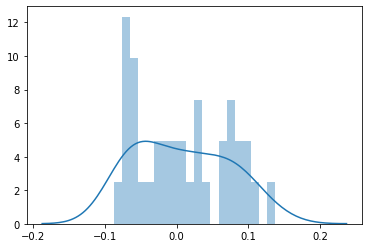

In [453]:
fig=plt.figure()
sns.distplot((y_camera-y_camera_train),bins=20)

In [454]:
camera_dislag_test[camera_dislag_test.columns]=scale.transform(camera_dislag_test[camera_dislag_test.columns])

In [455]:
x_camera_test=camera_dislag_test.drop(['gmv'],axis=1)
y_camera_test=camera_dislag_test['gmv']

In [456]:
x_camera_test=x_camera_test[x_camera_train.columns]

In [457]:
y_camera_pred=dislag_camera.predict(x_camera_test)

In [458]:
r2_score(y_camera_test,y_camera_pred)

0.8917361203807072

In [459]:
mean_squared_error(y_camera_test,y_camera_pred)

0.003272326735765518

#Dist lag model for home_audio dataset

In [460]:
#home_audio dataset
home_audio_dislag=home_audio
home_audio_dislag['gmv_lag']=home_audio_dislag['gmv'].shift(1)
home_audio_dislag['units_lag']=home_audio_dislag['units'].shift(1)
home_audio_dislag['Digital_adstock_lag']=home_audio_dislag['Digital_adstock'].shift(1)

In [461]:
#home_audio=home_audio.drop(['gmv','units','Digital_adstock'],axis=1)

In [462]:
home_audio_dislag=home_audio_dislag.fillna(0)

In [463]:
home_audio_dislag_train,home_audio_dislag_test=train_test_split(home_audio_dislag,train_size=0.75,test_size=0.25,random_state=100)

In [464]:
home_audio_dislag_train[home_audio_dislag_train.columns]=scale.fit_transform(home_audio_dislag_train[home_audio_dislag_train.columns])

In [465]:
x_home_audio=home_audio_dislag_train.drop(['gmv'],axis=1)
y_home_audio=home_audio_dislag_train['gmv']

In [466]:
lr.fit(x_home_audio,y_home_audio)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_home_audio,y_home_audio)

In [467]:
x_home_audio=x_home_audio[x_home_audio.columns[rfe.support_]]

In [468]:
x_home_audio_train=sm.add_constant(x_home_audio)
dislag_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
dislag_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     937.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           5.98e-31
Time:                        00:21:36   Log-Likelihood:                 102.08
No. Observations:                  36   AIC:                            -186.2
Df Residuals:                      27   BIC:                            -171.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0453      0.014      3.309      0.003       0.017       0.073
units                         0.5978      0.047     12.646      0.000       0.501       0.695
product_mrp                   0.3927      0.045      8.695      0.000       0.300       0.485
Sponsorship_adstock          -0.0499      0.019     -2.646      0.013      -0.089      -0.011
Content_Marketing_adstock     0.0309      0.026      1.202      0.240      -0.022       0.084
Online_Marketing_adstock      0.1405      0.078      1.804      0.082      -0.019       0.300
Affiliates_adstock           -0.1638      0.074     -2.203      0.036      -0.316      -0.011
gmv_lag                       0.8160      0.207      3.940      0.001       0.391       1.241
units_lag                    -0.7479      0.205     -3.646      0.001      -1.169      -0.327
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.265
Skew:                           0.197   Prob(JB):                        0.876
Kurtosis:                       2.856   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [469]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
7,gmv_lag,123.40
8,units_lag,121.09
5,Online_Marketing_adstock,70.11
6,Affiliates_adstock,62.93
0,const,25.10
2,product_mrp,16.86
1,units,15.76
4,Content_Marketing_adstock,5.96
3,Sponsorship_adstock,3.65


In [470]:
x_home_audio=x_home_audio.drop(['gmv_lag'],axis=1)

In [471]:
x_home_audio_train=sm.add_constant(x_home_audio)
dislag_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
dislag_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     704.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           9.86e-30
Time:                        00:21:36   Log-Likelihood:                 93.907
No. Observations:                  36   AIC:                            -171.8
Df Residuals:                      28   BIC:                            -159.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0325      0.016      1.981      0.058      -0.001       0.066
units                         0.6062      0.058     10.417      0.000       0.487       0.725
product_mrp                   0.3827      0.056      6.886      0.000       0.269       0.497
Sponsorship_adstock          -0.0678      0.023     -3.006      0.006      -0.114      -0.022
Content_Marketing_adstock     0.0453      0.031      1.447      0.159      -0.019       0.109
Online_Marketing_adstock      0.2190      0.093      2.362      0.025       0.029       0.409
Affiliates_adstock           -0.2489      0.088     -2.839      0.008      -0.429      -0.069
units_lag                     0.0546      0.030      1.828      0.078      -0.007       0.116
==============================================================================
Omnibus:                        0.926   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.908
Skew:                          -0.345   Prob(JB):                        0.635
Kurtosis:                       2.641   Cond. No.                         66.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [472]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Online_Marketing_adstock,65.51
6,Affiliates_adstock,57.62
0,const,23.67
2,product_mrp,16.81
1,units,15.72
4,Content_Marketing_adstock,5.84
3,Sponsorship_adstock,3.44
7,units_lag,1.69


In [473]:
x_home_audio=x_home_audio.drop(['Online_Marketing_adstock'],axis=1)

In [474]:
x_home_audio_train=sm.add_constant(x_home_audio)
dislag_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
dislag_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     708.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.47e-30
Time:                        00:21:36   Log-Likelihood:                 90.637
No. Observations:                  36   AIC:                            -167.3
Df Residuals:                      29   BIC:                            -156.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0429      0.017      2.525      0.017       0.008       0.078
units                         0.5667      0.060      9.449      0.000       0.444       0.689
product_mrp                   0.4186      0.058      7.277      0.000       0.301       0.536
Sponsorship_adstock          -0.0609      0.024     -2.530      0.017      -0.110      -0.012
Content_Marketing_adstock     0.0830      0.029      2.864      0.008       0.024       0.142
Affiliates_adstock           -0.0444      0.015     -2.983      0.006      -0.075      -0.014
units_lag                     0.0499      0.032      1.557      0.130      -0.016       0.116
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.089
Skew:                          -0.011   Prob(JB):                        0.957
Kurtosis:                       2.758   Cond. No.                         34.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [475]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,21.96
2,product_mrp,15.55
1,units,14.42
4,Content_Marketing_adstock,4.32
3,Sponsorship_adstock,3.38
6,units_lag,1.68
5,Affiliates_adstock,1.44


In [476]:
x_home_audio=x_home_audio.drop(['product_mrp'],axis=1)

In [477]:
x_home_audio_train=sm.add_constant(x_home_audio)
dislag_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
dislag_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     307.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           8.17e-25
Time:                        00:21:36   Log-Likelihood:                 71.938
No. Observations:                  36   AIC:                            -131.9
Df Residuals:                      30   BIC:                            -122.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0157      0.025     -0.634      0.531      -0.066       0.035
units                         0.9810      0.031     31.503      0.000       0.917       1.045
Sponsorship_adstock          -0.1068      0.038     -2.782      0.009      -0.185      -0.028
Content_Marketing_adstock     0.1119      0.047      2.358      0.025       0.015       0.209
Affiliates_adstock           -0.0125      0.024     -0.531      0.599      -0.061       0.036
units_lag                     0.0584      0.053      1.102      0.279      -0.050       0.167
==============================================================================
Omnibus:                        2.991   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.015
Skew:                           0.566   Prob(JB):                        0.365
Kurtosis:                       3.249   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [478]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,17.03
3,Content_Marketing_adstock,4.24
2,Sponsorship_adstock,3.15
5,units_lag,1.68
1,units,1.42
4,Affiliates_adstock,1.31


In [479]:
x_home_audio=x_home_audio.drop(['Content_Marketing_adstock'],axis=1)

In [480]:
x_home_audio_train=x_home_audio
dislag_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
dislag_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1695.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    9.52e-37
Time:                        00:21:36   Log-Likelihood:                          65.799
No. Observations:                  36   AIC:                                     -123.6
Df Residuals:                      32   BIC:                                     -117.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
units                   0.9784      0.028     34.403      0.000       0.920       1.036
Sponsorship_adstock    -0.0415      0.027     -1.514      0.140      -0.097       0.014
Affiliates_adstock     -0.0478      0.024     -1.976      0.057      -0.097       0.001
units_lag               0.0921      0.051      1.810      0.080      -0.012       0.196
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.564
Skew:                           0.289   Prob(JB):                        0.754
Kurtosis:                       3.204   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [481]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Affiliates_adstock,7.24
0,units,6.17
3,units_lag,5.40
1,Sponsorship_adstock,3.09


In [482]:
x_home_audio_train.corr()

,units,Sponsorship_adstock,Affiliates_adstock,units_lag
units,1.000000,0.071560,0.328485,0.244144
Sponsorship_adstock,0.071560,1.000000,0.305570,0.369849
Affiliates_adstock,0.328485,0.305570,1.000000,0.300196
units_lag,0.244144,0.369849,0.300196,1.000000


In [483]:
x_home_audio=x_home_audio.drop(['Affiliates_adstock'],axis=1)

In [484]:
x_home_audio_train=x_home_audio
dislag_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
dislag_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2076.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.20e-37
Time:                        00:21:36   Log-Likelihood:                          63.728
No. Observations:                  36   AIC:                                     -121.5
Df Residuals:                      33   BIC:                                     -116.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
units                   0.9448      0.024     39.695      0.000       0.896       0.993
Sponsorship_adstock    -0.0575      0.027     -2.110      0.043      -0.113      -0.002
units_lag               0.0638      0.051      1.254      0.219      -0.040       0.167
==============================================================================
Omnibus:                        3.927   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                2.740
Skew:                           0.648   Prob(JB):                        0.254
Kurtosis:                       3.381   Cond. No.                         5.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [485]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,units_lag,4.98
0,units,3.97
1,Sponsorship_adstock,2.81


In [486]:
x_home_audio_train.corr()

,units,Sponsorship_adstock,units_lag
units,1.000000,0.071560,0.244144
Sponsorship_adstock,0.071560,1.000000,0.369849
units_lag,0.244144,0.369849,1.000000


In [487]:
x_home_audio=x_home_audio.drop(['units_lag'],axis=1)

In [488]:
x_home_audio_train=x_home_audio
dislag_home_audio=sm.OLS(y_home_audio,x_home_audio_train).fit()
dislag_home_audio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3062.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    4.12e-39
Time:                        00:21:37   Log-Likelihood:                          62.891
No. Observations:                  36   AIC:                                     -121.8
Df Residuals:                      34   BIC:                                     -118.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
units                   0.9649      0.018     54.192      0.000       0.929       1.001
Sponsorship_adstock    -0.0414      0.024     -1.707      0.097      -0.091       0.008
==============================================================================
Omnibus:                        5.211   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.751
Skew:                           0.631   Prob(JB):                        0.153
Kurtosis:                       3.954   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
vif=pd.DataFrame()

vif['Features']=x_home_audio_train.columns
vif['VIF']=[variance_inflation_factor(x_home_audio_train.values,i) for i in range(x_home_audio_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,units,2.18
1,Sponsorship_adstock,2.18


In [490]:
y_home_audio_train=dislag_home_audio.predict(x_home_audio_train)

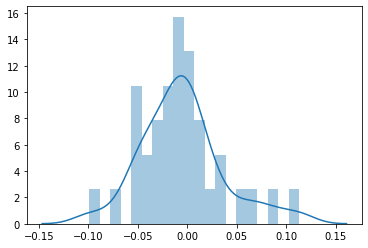

In [491]:
fig=plt.figure()
sns.distplot((y_home_audio-y_home_audio_train),bins=20)

In [492]:
home_audio_dislag_test[home_audio_dislag_test.columns]=scale.transform(home_audio_dislag_test[home_audio_dislag_test.columns])

In [493]:
x_home_audio_test=home_audio_dislag_test.drop(['gmv'],axis=1)
y_home_audio_test=home_audio_dislag_test['gmv']

In [494]:
x_home_audio_test=x_home_audio_test[x_home_audio_train.columns]

In [495]:
y_home_audio_pred=dislag_home_audio.predict(x_home_audio_test)

In [496]:
r2_score(y_home_audio_test,y_home_audio_pred)

0.9675221995381519

In [497]:
mean_squared_error(y_home_audio_test,y_home_audio_pred)

0.020308018089925304

#Dist log model for gaming dataset

In [498]:
#gaming dataset
gaming_dislag=gaming
gaming_dislag['gmv_lag']=gaming_dislag['gmv'].shift(1)
gaming_dislag['units_lag']=gaming_dislag['units'].shift(1)
gaming_dislag['Digital_adstock_lag']=gaming_dislag['Digital_adstock'].shift(1)

In [499]:
gaming=gaming.drop(['gmv','units','Digital_adstock'],axis=1)

In [500]:
gaming_dislag=gaming_dislag.fillna(0)

In [501]:
gaming_dislag_train,gaming_dislag_test=train_test_split(gaming_dislag,train_size=0.7,test_size=0.3,random_state=100)

In [502]:
gaming_dislag_train[gaming_dislag_train.columns]=scale.fit_transform(gaming_dislag_train[gaming_dislag_train.columns])

In [503]:
x_gaming=gaming_dislag_train.drop(['gmv'],axis=1)
y_gaming=gaming_dislag_train['gmv']

In [504]:
lr.fit(x_gaming,y_gaming)

# using RFE on linear model
rfe=RFE(lr,8)
rfe=rfe.fit(x_gaming,y_gaming)

In [505]:
x_gaming=x_gaming[x_gaming.columns[rfe.support_]]

In [506]:
x_gaming_train=sm.add_constant(x_gaming)
dislag_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
dislag_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     80.36
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.94e-17
Time:                        00:21:41   Log-Likelihood:                 69.606
No. Observations:                  37   AIC:                            -121.2
Df Residuals:                      28   BIC:                            -106.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0131      0.036     -0.368      0.715      -0.086       0.060
units                         1.0297      0.052     19.639      0.000       0.922       1.137
TV_adstock                    0.4370      0.122      3.589      0.001       0.188       0.686
Digital_adstock               0.5013      0.230      2.183      0.038       0.031       0.972
Content_Marketing_adstock    -0.8060      0.233     -3.456      0.002      -1.284      -0.328
Online_Marketing_adstock      0.9735      0.330      2.947      0.006       0.297       1.650
Affiliates_adstock           -1.0828      0.309     -3.504      0.002      -1.716      -0.450
Radio_adstock                 0.3804      0.188      2.022      0.053      -0.005       0.766
Other_adstock                -0.3112      0.176     -1.773      0.087      -0.671       0.048
==============================================================================
Omnibus:                        0.752   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.816
Skew:                           0.293   Prob(JB):                        0.665
Kurtosis:                       2.569   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [507]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
5,Online_Marketing_adstock,241.30
6,Affiliates_adstock,211.81
4,Content_Marketing_adstock,88.20
3,Digital_adstock,73.48
7,Radio_adstock,55.55
8,Other_adstock,50.30
0,const,26.11
2,TV_adstock,23.43
1,units,1.49


In [508]:
x_gaming=x_gaming.drop(['Online_Marketing_adstock'],axis=1)

In [509]:
x_gaming_train=sm.add_constant(x_gaming)
dislag_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
dislag_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     71.63
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.40e-16
Time:                        00:21:41   Log-Likelihood:                 64.609
No. Observations:                  37   AIC:                            -113.2
Df Residuals:                      29   BIC:                            -100.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0002      0.040     -0.006      0.995      -0.082       0.081
units                         1.0620      0.058     18.417      0.000       0.944       1.180
TV_adstock                    0.5046      0.134      3.752      0.001       0.230       0.780
Digital_adstock               0.5355      0.258      2.077      0.047       0.008       1.063
Content_Marketing_adstock    -0.6938      0.259     -2.681      0.012      -1.223      -0.165
Affiliates_adstock           -0.1954      0.078     -2.507      0.018      -0.355      -0.036
Radio_adstock                 0.6314      0.189      3.347      0.002       0.246       1.017
Other_adstock                -0.5702      0.171     -3.336      0.002      -0.920      -0.221
==============================================================================
Omnibus:                        2.432   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.159
Skew:                          -0.496   Prob(JB):                        0.340
Kurtosis:                       2.355   Cond. No.                         75.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [510]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
4,Content_Marketing_adstock,85.85
3,Digital_adstock,73.29
6,Radio_adstock,44.17
7,Other_adstock,37.69
0,const,25.72
2,TV_adstock,22.60
5,Affiliates_adstock,10.65
1,units,1.42


In [511]:
x_gaming_train=x_gaming
dislag_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
dislag_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              500.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.87e-29
Time:                        00:21:41   Log-Likelihood:                          64.609
No. Observations:                  37   AIC:                                     -115.2
Df Residuals:                      30   BIC:                                     -103.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.0620      0.056     18.838      0.000       0.947       1.177
TV_adstock                    0.5043      0.120      4.207      0.000       0.259       0.749
Digital_adstock               0.5342      0.128      4.184      0.000       0.273       0.795
Content_Marketing_adstock    -0.6924      0.127     -5.435      0.000      -0.952      -0.432
Affiliates_adstock           -0.1954      0.077     -2.553      0.016      -0.352      -0.039
Radio_adstock                 0.6307      0.149      4.245      0.000       0.327       0.934
Other_adstock                -0.5696      0.134     -4.259      0.000      -0.843      -0.296
==============================================================================
Omnibus:                        2.434   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.158
Skew:                          -0.495   Prob(JB):                        0.340
Kurtosis:                       2.353   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [512]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,TV_adstock,60.80
4,Affiliates_adstock,52.26
5,Radio_adstock,34.70
6,Other_adstock,31.55
2,Digital_adstock,29.98
3,Content_Marketing_adstock,27.57
0,units,6.89


In [513]:
x_gaming=x_gaming.drop(['TV_adstock'],axis=1)

In [514]:
x_gaming_train=x_gaming
dislag_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
dislag_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              377.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.46e-27
Time:                        00:21:41   Log-Likelihood:                          56.029
No. Observations:                  37   AIC:                                     -100.1
Df Residuals:                      31   BIC:                                     -90.39
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.0814      0.070     15.515      0.000       0.939       1.224
Digital_adstock               0.3816      0.152      2.513      0.017       0.072       0.691
Content_Marketing_adstock    -0.4705      0.144     -3.271      0.003      -0.764      -0.177
Affiliates_adstock            0.1031      0.036      2.889      0.007       0.030       0.176
Radio_adstock                 0.0628      0.077      0.816      0.421      -0.094       0.220
Other_adstock                -0.0685      0.075     -0.908      0.371      -0.222       0.085
==============================================================================
Omnibus:                        3.763   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.435
Skew:                          -0.523   Prob(JB):                        0.296
Kurtosis:                       3.696   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [515]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,Digital_adstock,27.56
2,Content_Marketing_adstock,22.85
3,Affiliates_adstock,7.38
0,units,6.85
5,Other_adstock,6.52
4,Radio_adstock,6.06


In [516]:
x_gaming=x_gaming.drop(['Digital_adstock'],axis=1)

In [517]:
x_gaming_train=x_gaming
dislag_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
dislag_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              387.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    1.23e-27
Time:                        00:21:41   Log-Likelihood:                          52.599
No. Observations:                  37   AIC:                                     -95.20
Df Residuals:                      32   BIC:                                     -87.14
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.1619      0.067     17.383      0.000       1.026       1.298
Content_Marketing_adstock    -0.1229      0.043     -2.882      0.007      -0.210      -0.036
Affiliates_adstock            0.0944      0.038      2.461      0.019       0.016       0.172
Radio_adstock                -0.0358      0.072     -0.501      0.620      -0.182       0.110
Other_adstock                 0.0005      0.076      0.007      0.995      -0.154       0.155
==============================================================================
Omnibus:                        4.611   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.445
Skew:                          -0.726   Prob(JB):                        0.179
Kurtosis:                       3.354   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Affiliates_adstock,7.31
4,Other_adstock,5.66
0,units,5.40
3,Radio_adstock,4.48
1,Content_Marketing_adstock,1.72


In [519]:
x_gaming=x_gaming.drop(['Other_adstock'],axis=1)

In [520]:
x_gaming_train=x_gaming
dislag_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
dislag_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              499.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    5.13e-29
Time:                        00:21:41   Log-Likelihood:                          52.599
No. Observations:                  37   AIC:                                     -97.20
Df Residuals:                      33   BIC:                                     -90.75
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.1619      0.065     17.792      0.000       1.029       1.295
Content_Marketing_adstock    -0.1230      0.040     -3.044      0.005      -0.205      -0.041
Affiliates_adstock            0.0945      0.035      2.698      0.011       0.023       0.166
Radio_adstock                -0.0354      0.042     -0.849      0.402      -0.120       0.049
==============================================================================
Omnibus:                        4.617   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.450
Skew:                          -0.727   Prob(JB):                        0.178
Kurtosis:                       3.354   Cond. No.                         5.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [521]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Affiliates_adstock,6.28
0,units,5.31
1,Content_Marketing_adstock,1.59
3,Radio_adstock,1.57


In [522]:
x_gaming=x_gaming.drop(['Radio_adstock'],axis=1)

In [523]:
x_gaming_train=x_gaming
dislag_gaming=sm.OLS(y_gaming,x_gaming_train).fit()
dislag_gaming.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              671.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                    2.59e-30
Time:                        00:21:41   Log-Likelihood:                          52.199
No. Observations:                  37   AIC:                                     -98.40
Df Residuals:                      34   BIC:                                     -93.56
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
units                         1.1629      0.065     17.886      0.000       1.031       1.295
Content_Marketing_adstock    -0.1123      0.038     -2.937      0.006      -0.190      -0.035
Affiliates_adstock            0.0834      0.032      2.577      0.014       0.018       0.149
==============================================================================
Omnibus:                        3.580   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                2.733
Skew:                          -0.663   Prob(JB):                        0.255
Kurtosis:                       3.116   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [524]:
vif=pd.DataFrame()

vif['Features']=x_gaming_train.columns
vif['VIF']=[variance_inflation_factor(x_gaming_train.values,i) for i in range(x_gaming_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,Affiliates_adstock,5.41
0,units,5.31
1,Content_Marketing_adstock,1.44


In [525]:
y_gaming_train=dislag_gaming.predict(x_gaming_train)

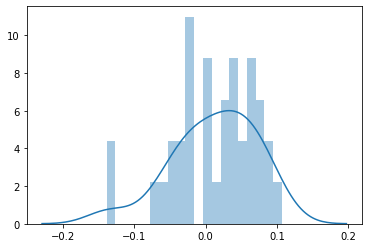

In [526]:
fig=plt.figure()
sns.distplot((y_gaming-y_gaming_train),bins=20)

In [527]:
gaming_dislag_test[gaming_dislag_test.columns]=scale.transform(gaming_dislag_test[gaming_dislag_test.columns])

In [528]:
x_gaming_test=gaming_dislag_test.drop(['gmv'],axis=1)
y_gaming_test=gaming_dislag_test['gmv']

In [529]:
x_gaming_test=x_gaming_test[x_gaming_train.columns]

In [530]:
y_gaming_pred=dislag_gaming.predict(x_gaming_test)

In [531]:
r2_score(y_gaming_test,y_gaming_pred)

0.9038810343488494

In [532]:
mean_squared_error(y_gaming_test,y_gaming_pred)

0.0037034163672736552

### Model results

Linear Models:

    #### Dataset	 R2 score	   MSE	      KPI
    #### Camera	     89.28	      0.0036084	  units,Digital_adstock
    #### Home Audio	 97.92	      0.000186	  product_mrp ,Digital_adstock 
    #### Gaming	     91.39	      0.0029259	  units, TV_adstock


Multiplicative Models: 
    
    #### Dataset	R2 score	MSE	        KPI
    #### Camera	    87.17	   0.0043219	units , sla, Content_Marketing_adstock 
    #### Home Audio	97.03	   8.7374	    product_mrp ,product_procurement_sla 
    #### Gaming	    91.99	   0.001963	    units ,product_mrp 


Koyck Model: 

    #### Dataset	R2 score	MSE	        KPI
    #### Camera	    96.88	   0.0009413	product_mrp ,product_procurement_sla ,Radio_adstock 
    #### Home Audio	99.64	   0.00191	    product_mrp , Digital_adstock 
    #### Gaming	    90.38	   0.0037034	Affiliates_adstock ,units , Content_Marketing_adstock 


Distributed Lag model: 
    
    #### Dataset	R2 score	MSE	        KPI
    #### Camera	    89.17	   0.0032723	units ,Digital_adstock 
    #### Home Audio	96.75	   0.02030801	units, Sponsorship_adstock
    #### Gaming	    90.38	   0.00370341	Affiliates_adstock ,units , Content_Marketing_adstock 
